**QUESTION 1**

section a(i) - data type and it's representation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Change csv file path if needed
train_data = pd.read_csv('/Users/john-zaatri/Desktop/semester 7/סדנה מעשית בלמידה עמוקה/תרגילים/תרגיל 2/bgu-i-know-what-you-did-last-measurement-time/train.csv')

# Path to the folder containing unlabeled data
folder_path = '/Users/john-zaatri/Desktop/semester 7/סדנה מעשית בלמידה עמוקה/תרגילים/תרגיל 2/bgu-i-know-what-you-did-last-measurement-time/unlabeled/unlabeled/'

train_data.head()

,Unnamed: 0,userid,activity,sensor,body_part,side,id,sequence_length
0,0,user01,stairs_up,smartwatch,hand,right,3387,3000
1,1,user01,walking_with_hands_in_pockets,smartwatch,hand,left,8473,4000
2,2,user08,walking_with_hands_in_pockets,smartwatch,hand,right,74365,3000
3,3,user01,walking_freely,smartwatch,hand,right,6223,3000
4,4,user07,using_phone,vicon,hand,left,61641,4000


Representation: The train.csv data likely represents labeled sensor data collected from wearable devices attached to human bodies during various activities. It includes information such as user ID, activity labels, sensor type, body part, side, and sequence length.
The goal is to use this labeled data to train models for classifying activities based on acceleration data recorded from wearable sensors.

let's do additional exploration to see what is the type of the data that we are interested in.

       Unnamed: 0            id  sequence_length
count  50248.0000  50248.000000     50248.000000
mean   25123.5000  38664.997313      3491.760866
std    14505.4925  22322.819331       407.933470
min        0.0000      0.000000      3000.000000
25%    12561.7500  19347.500000      3000.000000
50%    25123.5000  38727.500000      3500.000000
75%    37685.2500  57974.250000      4000.000000
max    50247.0000  77303.000000      4000.000000 

Unnamed: 0          int64
userid             object
activity           object
sensor             object
body_part          object
side               object
id                  int64
sequence_length     int64
dtype: object 

Unnamed: 0         0
userid             0
activity           0
sensor             0
body_part          0
side               0
id                 0
sequence_length    0
dtype: int64 

Unique activities including the following: ['stairs_up' 'walking_with_hands_in_pockets' 'walking_freely'
 'using_phone' 'reading_book' 'idle' 'walking

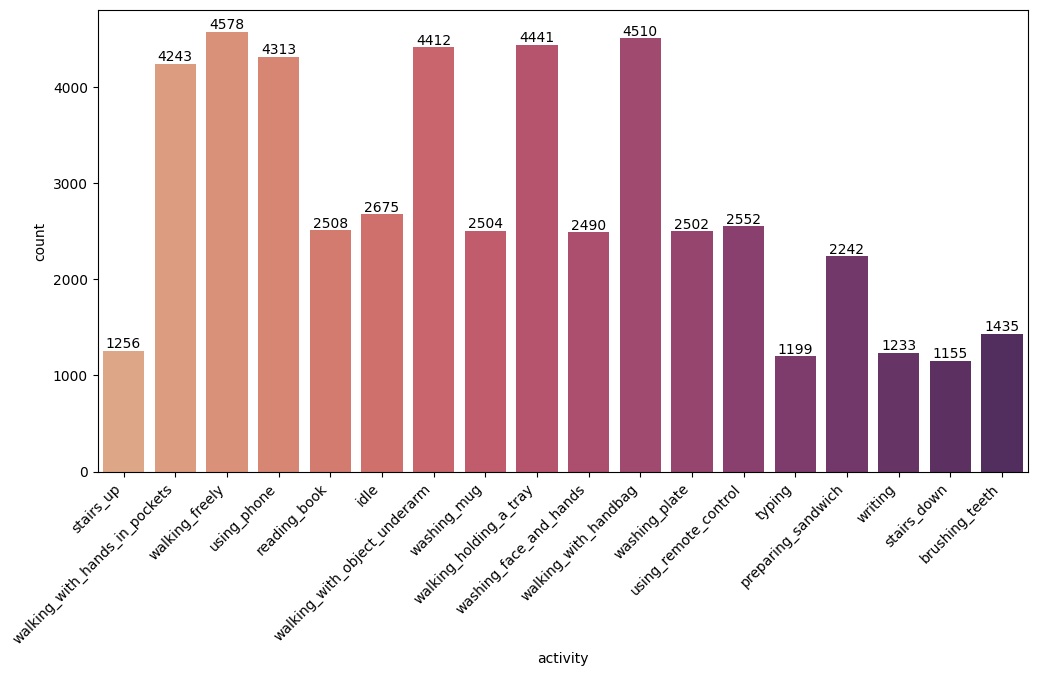

In [2]:
# Display basic statistics about numerical columns
print(train_data.describe(), "\n")

# Check data types of each column
print(train_data.dtypes, "\n")

# Check for missing values
print(train_data.isnull().sum(), "\n")

# Explore unique values in categorical columns
unique_activities = train_data['activity'].unique()
unique_sensors = train_data['sensor'].unique()
unique_body_parts = train_data['body_part'].unique()
unique_sides = train_data['side'].unique() # propably right and left but we have to check
unique_users = train_data['userid'].unique()
print(f"Unique activities including the following: {unique_activities} \n")
print(f"Unique sensors including the following: {unique_sensors}")
print(f"Unique body parts including the following: {unique_body_parts}")
print(f"Unique body sides including the following: {unique_sides}")
print(f"Unique users including the following: {unique_users}")

# Visualize the distribution of activities
import seaborn as sns


plt.figure(figsize=(12, 6))

# Specify a color palette ('flare' is a built-in palette in Seaborn)
ax = sns.countplot(x='activity', data=train_data, hue='activity', palette=sns.color_palette("flare", len(set(train_data['activity']))), legend=False)
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.show()

**Descriptive Statistics:**
Count: The dataset contains 50,248 records.
Mean Sequence Length: The average sequence length is around 3491.76 data points. (intresting?!)
Min and Max Sequence Length: Sequences vary in length, ranging from 3000 to 4000 data points. (as explained in the lecture)

**Data Types:**
Numeric Columns:
Unnamed: id, and sequence_length are numeric columns.
Categorical Columns:
userid, activity, sensor, body_part, and side are categorical columns.

**Missing Values:**
There are no missing values in any of the columns. :-)

**Unique Values in Categorical Columns:**
Activities:
There are 18 unique activity labels, including activities such as walking, using the phone, reading a book, and more.
Sensors:
Two types of sensors: 'smartwatch' and 'vicon'.
Body Parts:
Two body parts: 'hand' and 'foot'.
Body Sides:
Two body sides: 'right' and 'left'.
Users:
8 different users ranging from 'user01' to 'user08'.

**Activity Distribution:**
The plot displays the distribution of activities in the dataset.
Some activities have higher counts, while others are less frequent.
Activities like 'walking_freely,' 'using_phone,' and 'walking_with_object_underarm' have counts exceeding 4000.

**Insights for Model Training:**
I have to consider the imbalance in activity counts when designing the model. Techniques such as class weighting or data augmentation may be helpfull.
Sequences of different lengths may require handling during preprocessing, especially when working with LSTM models.

In this section of the project, our main focus is on understanding and exploring the labeled training data (train.csv). Additionally, I will provide an overview of the unlabeled data (type #1 and type #2). While we can briefly examine its structure, representation, and data types, it's important to note that a subset of the unlabeled data (50248 samples) is utilized for training, and the remaining files are intended for prediction and testing the model.

In [3]:
# let's load a sample of the unlabeled files

type1_file_path = '/Users/john-zaatri/Desktop/semester 7/סדנה מעשית בלמידה עמוקה/תרגילים/תרגיל 2/bgu-i-know-what-you-did-last-measurement-time/unlabeled/unlabeled/2.csv'

# Load the type #1 data into a DataFrame
type1_data = pd.read_csv(type1_file_path)

print(type1_data.head(), "\n")

# Display data types of each column
print(type1_data.dtypes, "\n")

# Explore unique values in relevant columns
unique_measurement_types_type1 = type1_data['measurement type'].unique()
print(f"Unique measurement types including the following: {unique_measurement_types_type1}\n")


# Let's keep acceleration measurements only
acceleration_data = type1_data[type1_data['measurement type'] == 'acceleration [m/s/s]']

# # Reset the index to have consecutive integers
# acceleration_data = acceleration_data.reset_index(drop=True)

# Display the filtered data
print("Filtered Acceleration Data:")
print(acceleration_data.head(), "\n")

# Display unique values in relevant columns in the filtered data
unique_measurement_types_acceleration = acceleration_data['measurement type'].unique()
print(f"Unique measurement types in the filtered data: {unique_measurement_types_acceleration}\n")

# Display the sequence length before and after filtering
print(f"Sequence Length Before Filtering: {len(type1_data)}")
print(f"Sequence Length After Filtering: {len(acceleration_data)}")

       measurement type          x          y         z
0     gyroscope [rad/s]   3.635503   7.079244 -7.012660
1  acceleration [m/s/s] -14.778334  -1.785656 -4.006954
2     magnetometer [uT] -30.195000  32.787500 -2.226500
3     gyroscope [rad/s]   3.899177   6.629134 -6.922105
4  acceleration [m/s/s] -13.907049  -0.359046 -3.375033 

measurement type     object
x                   float64
y                   float64
z                   float64
dtype: object 

Unique measurement types including the following: ['gyroscope [rad/s]' 'acceleration [m/s/s]' 'magnetometer [uT]']

Filtered Acceleration Data:
        measurement type          x         y         z
1   acceleration [m/s/s] -14.778334 -1.785656 -4.006954
4   acceleration [m/s/s] -13.907049 -0.359046 -3.375033
7   acceleration [m/s/s] -13.217681  1.354800 -2.532471
10  acceleration [m/s/s] -12.557036  3.269712 -1.680335
13  acceleration [m/s/s] -10.757019  6.860173 -0.512239 

Unique measurement types in the filtered data: ['acc

Type 1 files represent sensor measurements including gyroscope readings in radians per second, acceleration in meters per second squared, and magnetometer readings in microteslas. (we will work on only with acceleration readings as explained in the assignment)

Data Format: The data contains three columns: 'x,' 'y,' and 'z,' representing the three dimensions of the sensor measurements.

The difference in sequence length after filtering to 1005 from the original 3000 may pose a challenge when training models that expect fixed-length sequences. For our case, recurrent neural networks (RNNs) and long short-term memory networks (LSTMs) expect consistent sequence lengths.

what can i do?!

In [4]:
# Load the type #2 data into a DataFrame
type2_data_brushing_teeth = pd.read_csv('/Users/john-zaatri/Desktop/semester 7/סדנה מעשית בלמידה עמוקה/תרגילים/תרגיל 2/bgu-i-know-what-you-did-last-measurement-time/unlabeled/unlabeled/50347.csv')
type2_data_brushing_teeth = type2_data_brushing_teeth.rename(columns={'x [m]': 'x', 'y [m]': 'y', 'z [m]': 'z'})
print(type2_data_brushing_teeth)

             x         y         z
0    -0.237669 -0.702205  1.446113
1    -0.237076 -0.701647  1.446830
2    -0.236906 -0.700730  1.447703
3    -0.237253 -0.699745  1.448095
4    -0.238490 -0.698672  1.448207
...        ...       ...       ...
2995 -0.242402 -0.693599  1.445658
2996 -0.242664 -0.691344  1.446275
2997 -0.244007 -0.689029  1.447121
2998 -0.245761 -0.687348  1.448006
2999 -0.248848 -0.685998  1.448788

[3000 rows x 3 columns]


In the code above, i loaded a Type 2 data file corresponding to the "brushing teeth" activity, similar to the previously analyzed Type 1 data. To gain deeper insights into potential differences between these datasets, we propose a visual comparison using data visualizations.

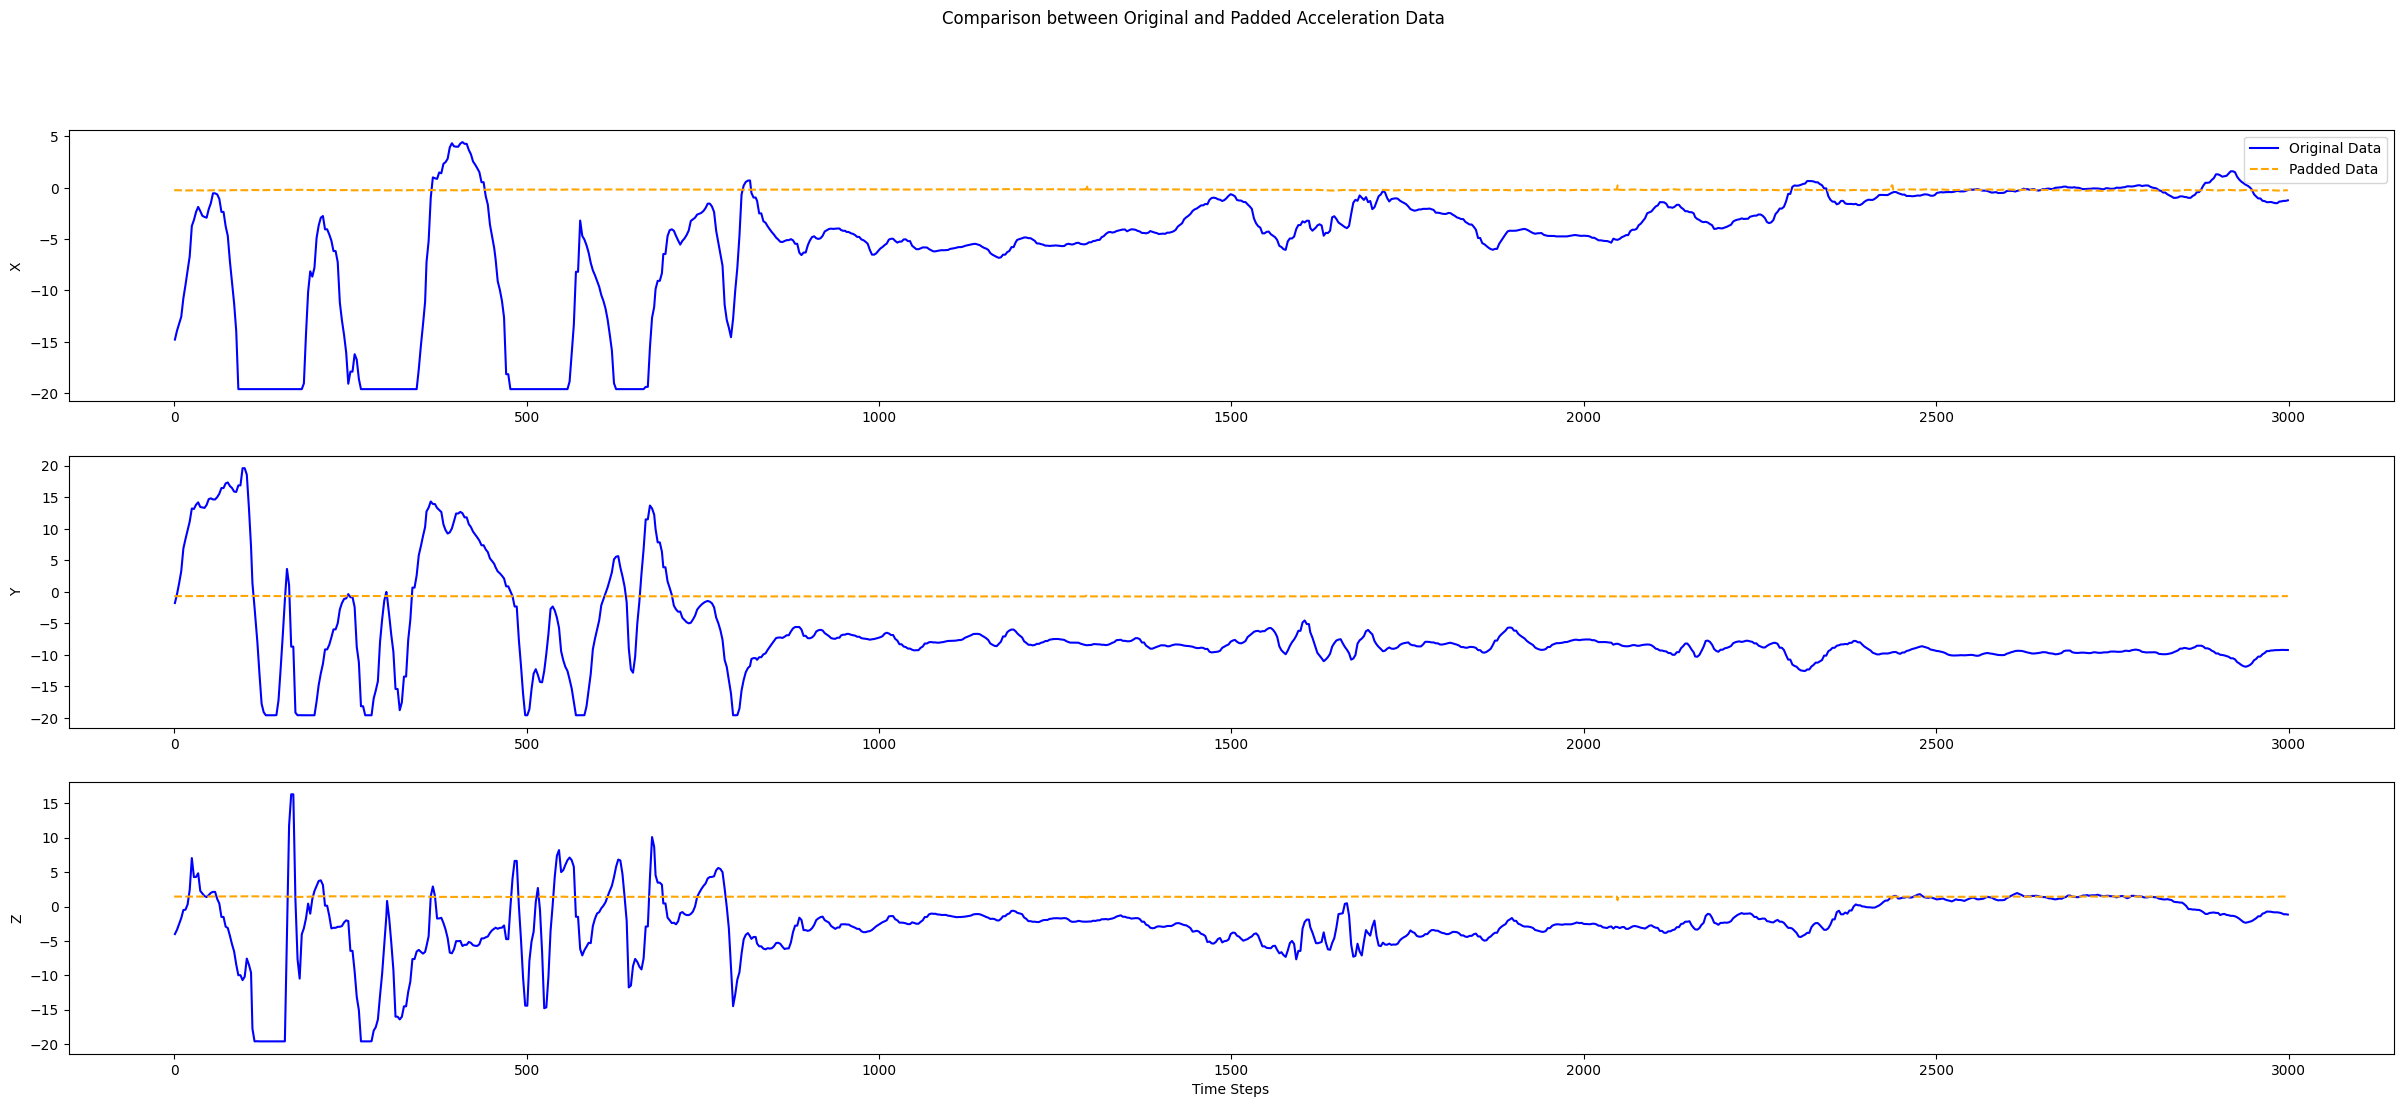

In [5]:
def plot_comparison(original_data, padded_data, title):
    fig, axes = plt.subplots(3, 1, figsize=(30, 12))
    axes = axes.flatten()

    for i, feature in enumerate(["x", "y", "z"]):
        axes[i].plot(original_data[feature], label="Original Data", color="blue")
        axes[i].plot(padded_data[feature], label="Padded Data", linestyle="--", color="orange")
        axes[i].set_ylabel(feature.capitalize())

    axes[0].legend()
    axes[-1].set_xlabel("Time Steps")
    plt.suptitle(title)
    plt.show()

# Plot the comparison
plot_comparison(acceleration_data, type2_data_brushing_teeth, "Comparison between Original and Padded Acceleration Data")


As we can see, it seems that there is a huge difference between the type 1 data and type 2 data, further exploration should be done in order to understand the differences between them and to fix the situation by doing normalization as an example.
I'll do this later (at the end of the sections or the question) since i want to finish exploring the basics of the data.

      x [m]     y [m]     z [m]
0 -0.808117  0.186944  0.840323
1 -0.810055  0.179628  0.837622
2 -0.812134  0.172245  0.834853
3 -0.814271  0.164908  0.832435
4 -0.816671  0.156617  0.830204 

x [m]    float64
y [m]    float64
z [m]    float64
dtype: object 



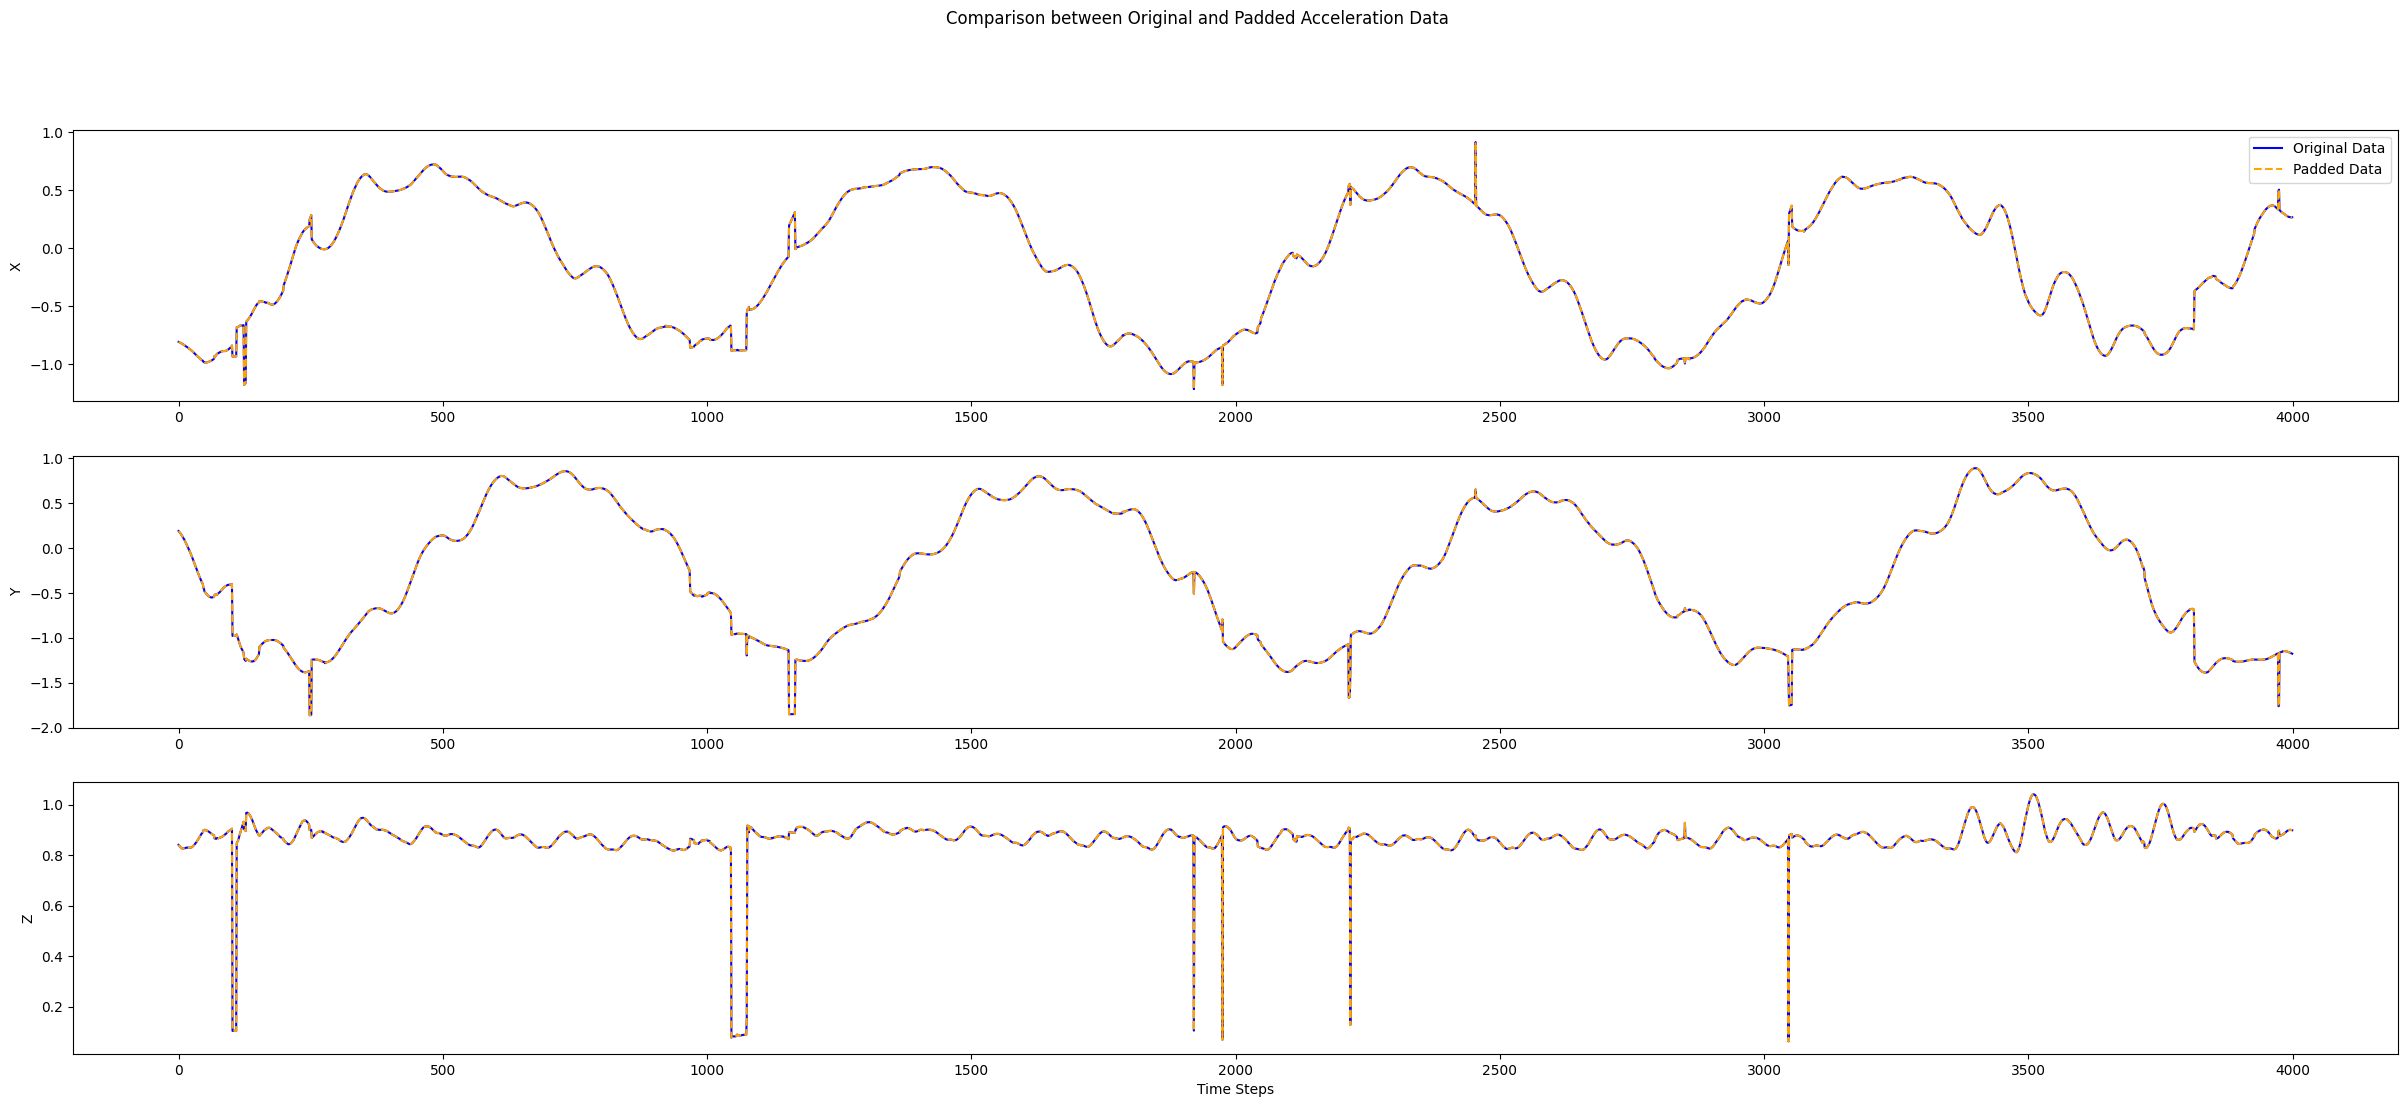

In [6]:
# Directory path to your type #2 data
type2_file_path = '/Users/john-zaatri/Desktop/semester 7/סדנה מעשית בלמידה עמוקה/תרגילים/תרגיל 2/bgu-i-know-what-you-did-last-measurement-time/unlabeled/unlabeled/73834.csv'

# Load the type #2 data into a DataFrame
type2_data = pd.read_csv(type2_file_path)

# Display the first few rows
print(type2_data.head(), "\n")

# Display data types of each column
print(type2_data.dtypes, "\n")

# Plot the graph
type2_data_plot = type2_data.rename(columns={'x [m]': 'x', 'y [m]': 'y', 'z [m]': 'z'})
plot_comparison(type2_data_plot, type2_data_plot, "Comparison between Original and Padded Acceleration Data")

Type 2 files represent sensor measurements with three dimensions of position in meters: 'x [m],' 'y [m],' and 'z [m].'

Data Format: Each file contains records with three columns representing the position in the x, y, and z dimensions.
we will use all the rows in this type of files as explained in the assignment.+

Also here we colud see that the data is type of normalized for very small numbers and we have to get so carefull with that in the future, even if to change all the csv file so all flow toughther as needed.

**Section a(ii)**

let's explore homogeneity of the data, we will focus on the distribution of numeric fetures and variability in categorical ones.

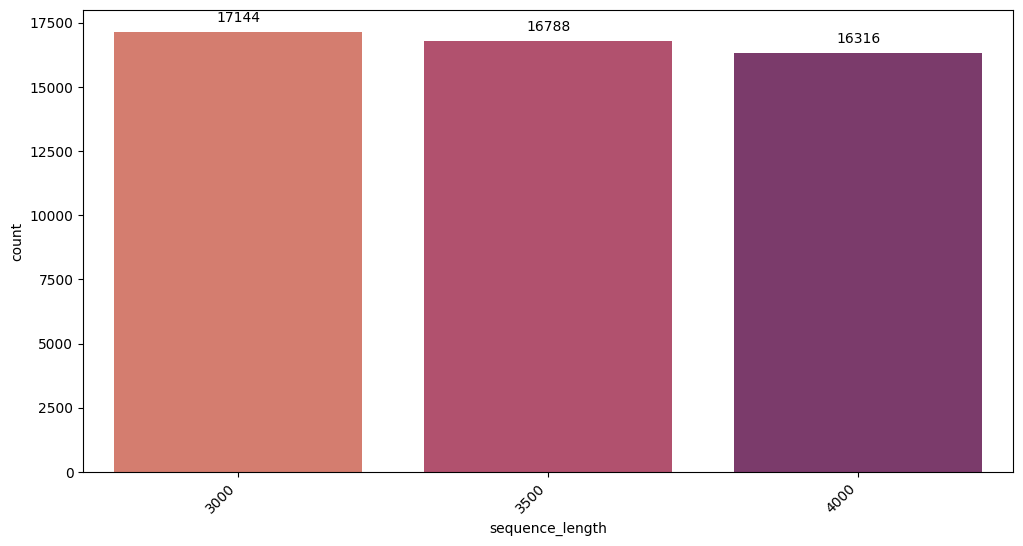

In [7]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='sequence_length', data=train_data, hue='sequence_length', palette=sns.color_palette("flare", len(set(train_data['sequence_length']))), legend=False)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

The dataset appears somewhat homogeneous in terms of sequence lengths. The counts for each sequence length (3000, 3500, 4000) are relatively close, indicating a balanced distribution. This balance suggests that the dataset covers a diverse set of activities or scenarios across different sequence lengths.

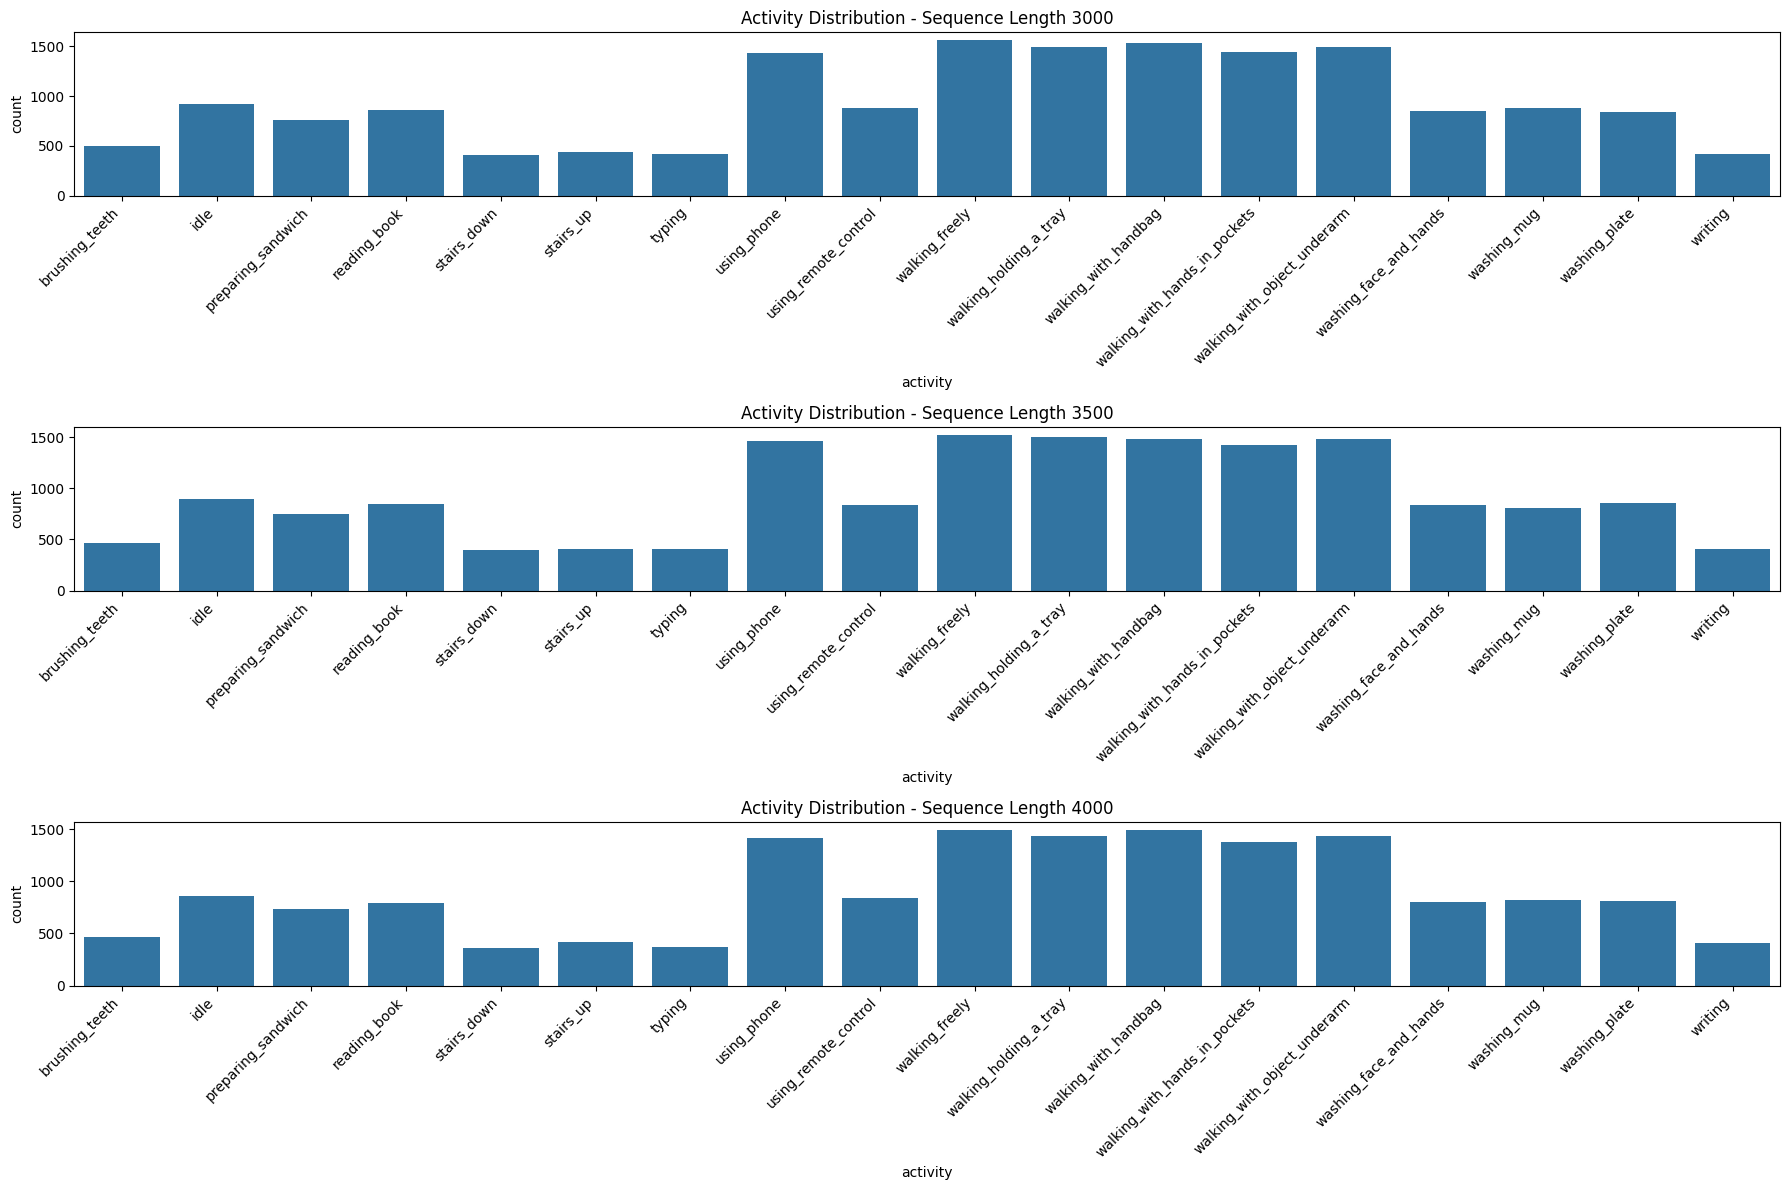

In [8]:
sequence_length_3000 = train_data[train_data['sequence_length'] == 3000]
sequence_length_3500 = train_data[train_data['sequence_length'] == 3500]
sequence_length_4000 = train_data[train_data['sequence_length'] == 4000]

sorted_activities = sorted(train_data['activity'].unique())

# Create count plots for each sequence length
plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
sns.countplot(x='activity', data=sequence_length_3000, order=sorted_activities)
plt.title('Activity Distribution - Sequence Length 3000')
plt.xticks(rotation=45, ha='right')

plt.subplot(3, 1, 2)
sns.countplot(x='activity', data=sequence_length_3500, order=sorted_activities)
plt.title('Activity Distribution - Sequence Length 3500')
plt.xticks(rotation=45, ha='right')

plt.subplot(3, 1, 3)
sns.countplot(x='activity', data=sequence_length_4000, order=sorted_activities)
plt.title('Activity Distribution - Sequence Length 4000')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The distribution of activities within each sequence length is not uniform.
Different activities exhibit different frequencies, creating a non-homogeneous distribution.

Implications:
Model Sensitivity: The model may become more sensitive to activities with higher counts, potentially impacting its ability to generalize well to less frequent activities.
Addressing Imbalances: Strategies such as data augmentation, adjusting class weights during training, or oversampling less frequent activities may be considered to address imbalances.(as i explained also before).

But... there are some happy surprises:  Activities exhibit similar distributions across different sequence lengths, it provides a good indication of overall consistency in the dataset. This consistency can be valuable for building a model that generalizes well across various activities and sequence lengths. (look at activity distributions among all sequnces.)

now let's check other features which in my opinion are worth checking but not important as the features we already checked.

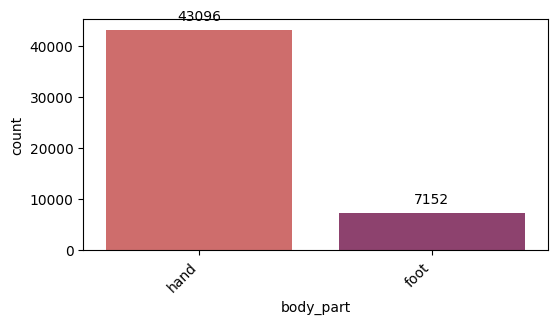

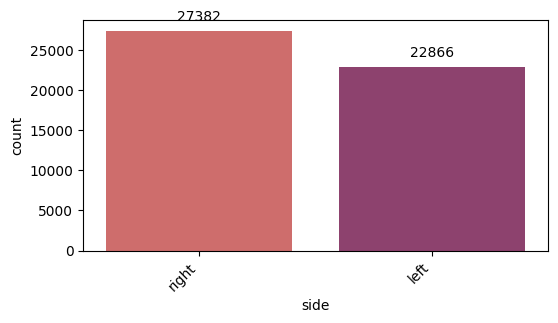

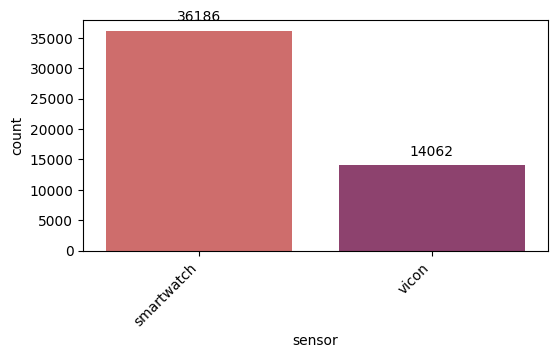

In [9]:
plt.figure(figsize=(6, 3))
ax = sns.countplot(x='body_part', data=train_data, hue='body_part', palette=sns.color_palette("flare", len(set(train_data['body_part']))), legend=False)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

plt.figure(figsize=(6, 3))
ax = sns.countplot(x='side', data=train_data, hue='side', palette=sns.color_palette("flare", len(set(train_data['side']))), legend=False)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

plt.figure(figsize=(6, 3))
ax = sns.countplot(x='sensor', data=train_data, hue='sensor', palette=sns.color_palette("flare", len(set(train_data['sensor']))), legend=False)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Body Part:

The majority of instances belong to the "hand" category (43096), while "foot" has fewer instances (7152).
Importance: This feature is important, as there is a significant imbalance in the distribution. The model may become more biased towards recognizing activities related to the "hand."

Side:

The distribution between "right" (27382) and "left" (22866) is relatively balanced.
Importance: This feature is less imbalanced compared to "body_part," but it's still crucial to ensure a fair representation of both sides.

Sensor:

The "smartwatch" category dominates with a higher count (36186) compared to "vicon" (14062).
Importance: This feature is essential, and the imbalance may impact the model's ability to generalize well across different sensor types.

This dataset seems to have sequences of consistent lengths (3000, 3500, 4000), which is good - it likely captures a variety of activities across different durations. However, there's a catch!

The problem is that while the lengths are balanced, the activities happening within each length might not be. Imagine if most 3000-length sequences were just hand movements, while 4000-length sequences had more diverse body parts involved. This imbalance could make the model biased towards "hand" activities and perform poorly on others.

Similarly, if most data comes from one side of the body or one specific sensor, the model won't be able to generalize well to different scenarios. It's like training a self-driving car only on sunny days - it'll crash the first time it rains!

To fix this, we might need to add more data of under-represented activities, like leg movements in shorter sequences. We could also adjust the model to pay more attention to these less frequent activities. Think of it as giving them a louder voice so the model hears them clearly.

Overall, while the consistent sequence lengths are a good sign, we need to be careful about hidden imbalances within them. With some adjustments, this dataset can be used to build a fair and generalizable model that understands all kinds of activities, not just the most common ones.

**Section a(iii)**

??How was the data labeled??

In the dataset, each row represents a labeled instance of an activity recorded from wearable sensors attached to the human body. The key columns in the train.csv file include:

userid: Identifier for the user.

activity: The labeled activity performed by the user (e.g., "walking_with_hands_in_pockets," "using_phone," "idle").

sensor: The type of sensor used for recording (e.g., "smartwatch," "vicon").

body_part: The part of the body to which the sensor is attached (e.g., "hand," "foot").

side: The side of the body (e.g., "right," "left").

id: A unique identifier for each instance.

sequence_length: The length of the recorded sequence.

The activities in the dataset are labeled based on the type of activity the user is engaged in during the recorded sequence. For example, if a user is walking with hands in pockets, the corresponding row in the dataset will have "walking_with_hands_in_pockets" in the "activity" column.

**Section a(iv)**

This section has already been answeres in the previous sections, but let's consider the following:


Not all activities in this dataset get equal play! Some, like "walking with hands in pockets" or "walking freely", are way more common than others. This means we can't treat all labels the same.

Here's what we need to do:

Prioritize: Figure out which activities matter most for what i am trying to achieve (e.g., "using_phone" might be super important, while "walking_freely" less so).

Balance the scales: Since some activities are way more popular, we need to adjust things during training so the model doesn't get stuck on the common ones and miss the rare ones. Imagine giving each activity a different weight depending on its frequency.

Validation of Labels: Validate the accuracy and consistency of labels. Although the dataset appears somewhat homogeneous, ensuring label accuracy is crucial for reliable model training.

The activity mix within each sequence length isn't even, which can affect how well the model generalizes. We need to be careful about how we treat the labels because of this.

We can add more data for under-represented activities, give them more weight during training, or use other tricks to make sure the model sees them all clearly.


**Section a(v)**

Number of Subjects:

The data includes information on different users identified by the "userid" column. The number of subjects, as i counted the unique values in the "userid" column before, were about 8 different users range from user01 to user08.

How was the competition data split to train/test:

Also as explained before (did i really explain much things before, wow!), the labeled training dataset is in the "train.csv" file, containing around 50,248 samples.
The unlabeled dataset consists of 124,992 CSV files. Among these, 50,248 files match the samples in the training set, and the remaining 74,744 files represent data not present in the training set,m which will be the data for testing, or as nathaniel explained, we will have to create a CSV file that loops over every sample in the unlabeled data not present in the training set.
For each of these samples, the model should provide probabilities for the 18 activities in a uniform distribution.

Validation Set:
The validation set should be derived from the training set. because the most common approach is to split the labeled training dataset into training and validation sets. This ensures that the model is trained on a portion of the data and evaluated on a separate portion.
Typically, a random split is used to ensure that the data in the training and validation sets are representative of the overall distribution.

Size of the Validation Set:
In my project, i'll go with the common practices include using 10-20% of the labeled data for validation. 

Let's take a break... (5 minutes maybe?)

ok, let's go

**Question 1 Section B**

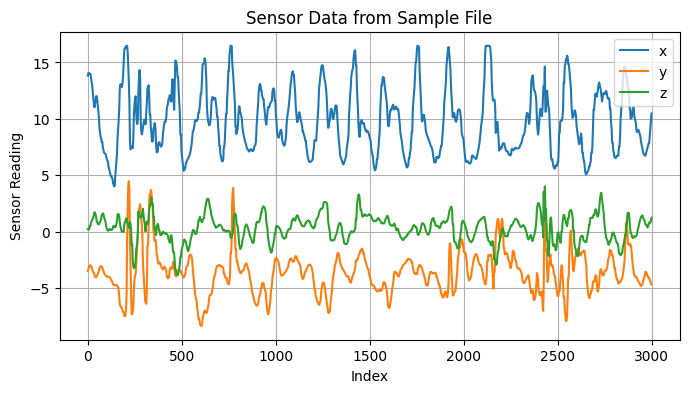

In [10]:
import pandas as pd

# Load a sample data file
sample_id = train_data['id'].iloc[0]  # Assuming 'id' is the column containing file names
sample_data = pd.read_csv(f'/Users/john-zaatri/Desktop/semester 7/סדנה מעשית בלמידה עמוקה/תרגילים/תרגיל 2/bgu-i-know-what-you-did-last-measurement-time/unlabeled/unlabeled/{sample_id}.csv')

sample_data = sample_data[sample_data['measurement type'] == 'acceleration [m/s/s]']

# Here is another plot of how the measurements data look like.
plt.figure(figsize=(8, 4))
for column in ['x', 'y', 'z']:
    plt.plot(sample_data[column], label=column)
plt.title('Sensor Data from Sample File')
plt.xlabel('Index')
plt.ylabel('Sensor Reading')
plt.legend()
plt.grid(True)
plt.show()


Task Type:

The task at hand is a classification problem. This determination is based on the nature of the target variable or outcome being predicted, which likely involves classifying activities or events based on sensor measurements.

Time Component:

Based on the project goal, it seems that the task involves generating predictions for activities based on sensor data from the unlabeled dataset. Specifically, the objective is to predict probabilities for 18 different activities for each sample in the unlabeled data that is not present in the training set.

Given this goal, the task can be classified as predicting additional information about past events. The model will analyze the sensor measurements from past events (recorded in the unlabeled dataset) and provide probabilities for different activities that occurred during those events. This information adds value by filling in missing labels for the unlabeled data, allowing for a more comprehensive understanding of past activities.

So, the objective is to forecast more details about events that have already happened using sensor data, instead of predicting what will happen in the future. This process focuses on looking back to improve the dataset's comprehensiveness and usefulness for future applications.

Qestion 1 is almost done!! ..yaay

**Question 1 Section C**

state two self-supervised tasks as we have seen in class to pretrain your models for next sections on:

1. **Denoising Autoencoder** (Task 1): 
 
In this task, we have to train a denoising autoencoder with constraints in the middle layers to reconstruct clean input data from noisy or corrupted input data. The autoencoder architecture includes constraints or regularization techniques, such as sparsity constraints or dropout layers, in the middle layers to encourage the learning of robust representations. The model is trained on a dataset where the input data is intentionally corrupted by adding noise or applying distortions. The autoencoder aims to reconstruct the original, clean input data while adhering to the imposed constraints in the middle layers.

2. **Masked Autoencoder** (Task 2): 
   
In this task, we have to train an autoencoder to predict missing or masked values in the input data. Similar to Task 1, the input data is first modified by masking certain values or features, effectively "hiding" parts of the input. The autoencoder is then trained to reconstruct the original input, including the masked values. By doing so, the model learns to infer missing information based on the context of the observed data, which can be useful for tasks such as inpainting or sequence completion.

Before moving to question 2, which is training our model and get the predictions, i want to test the following:

1. We have noticed before that type 1 files after removing the irrelevant rows, get a much smaller count of rows, which is not good enough for training the model as i explained before, now i will test the best strategy for doing padding for these files. (If needed, maybe not).

2. We also noticed that type 2 files  are normalized a lot compared to type 1 files (even for the same activities), and if needed, i would like to test the opportunity to enlarge type 2 files or normalize type 1 files.

Before, let's put type 1 files, and type 2 files.

In [11]:
# Initialize an empty list to store data frames
type1_data_frames = []
type2_data_frames = []
# Loop through all files in the folder
for file_name in os.listdir(folder_path):

    file_path = os.path.join(folder_path, file_name)
    # Read the CSV file into a data frame
    df = pd.read_csv(file_path)
    # Check if it's a type 1 file based on the "measurement type" column
    if 'measurement type' in df.columns:
        # Append the data frame to the list of type 1 data frames
        type1_data_frames.append(df)
    else:
        # Append the data frame to the list of type 2 data frames
        type2_data_frames.append(df)

print(len(type1_data_frames))
print(len(type2_data_frames))

88373
36619


We can see that type 1 files (88373) are much more than type 2 files (36619) inculding the train and test data. But if i got a way to normalize the data so they flow with each other, this will no longer be a problem.

Let's check the training data:

In [12]:
# Dictionary to store DataFrames and additional information
data = {}

# Iterate through each row in train.csv
for index, row in train_data.iterrows():
    id_ = row['id']
    csv_filename = os.path.join(folder_path, f"{id_}.csv")
    df = pd.read_csv(csv_filename)
    userid = row['userid']
    sensor = row['sensor']
    body_part = row['body_part']
    side = row['side']
    sequence_length = row['sequence_length']
    activity = row['activity']
    data[id_] = {
        'dataframe': df,
        'userid': userid,
        'sensor': sensor,
        'body_part': body_part,
        'side': side,
        'sequence_length': sequence_length,
        'activity': activity
    }

In [13]:
#Let's create two lists for each having all the files of it's type
type1_files = []
type2_files = []

# Iterate over the data dictionary
for id_, info in data.items():
    df = info['dataframe']
    # Check if 'measurement type' column exists
    if 'measurement type' in df.columns:
        type1_files.append(df)
    else:
        type2_files.append(df)

print(f"Total count of type 1: {len(type1_files)}")
print(f"Total count of type 2: {len(type2_files)}")

Total count of type 1: 36186
Total count of type 2: 14062


In [14]:
# Loop over type 1 files and remove rows where measurement type is not 'acceleration [m/s/s]'
for df in type1_files:
    df.drop(df[df['measurement type'] != 'acceleration [m/s/s]'].index, inplace=True)

# Loop over type 2 files and rename columns
for df in type2_files:
    df.rename(columns={'x [m]': 'x', 'y [m]': 'y', 'z [m]': 'z'}, inplace=True)

In [15]:
print(type1_files[0])
print(type2_files[0])

          measurement type          x         y         z
1     acceleration [m/s/s]  13.830453 -3.489927  0.205853
4     acceleration [m/s/s]  14.060242 -3.346309  0.167555
7     acceleration [m/s/s]  14.069817 -3.173967  0.177129
9     acceleration [m/s/s]  14.012369 -3.039923  0.292024
12    acceleration [m/s/s]  13.983645 -2.982476  0.502664
...                    ...        ...       ...       ...
2986  acceleration [m/s/s]   7.827203 -4.121848  0.713305
2989  acceleration [m/s/s]   8.526146 -4.265467  0.856923
2992  acceleration [m/s/s]   9.119769 -4.437809  0.799476
2995  acceleration [m/s/s]   9.799562 -4.610151  0.914371
2998  acceleration [m/s/s]  10.469782 -4.705896  1.220756

[1007 rows x 4 columns]
             x         y         z
0    -1.237511  0.983371  0.147218
1    -1.237218  0.983471  0.147289
2    -1.236726  0.983274  0.147624
3    -1.236397  0.983243  0.147607
4    -1.234924  0.983950  0.150131
...        ...       ...       ...
3995 -0.856768  0.080976  0.940508

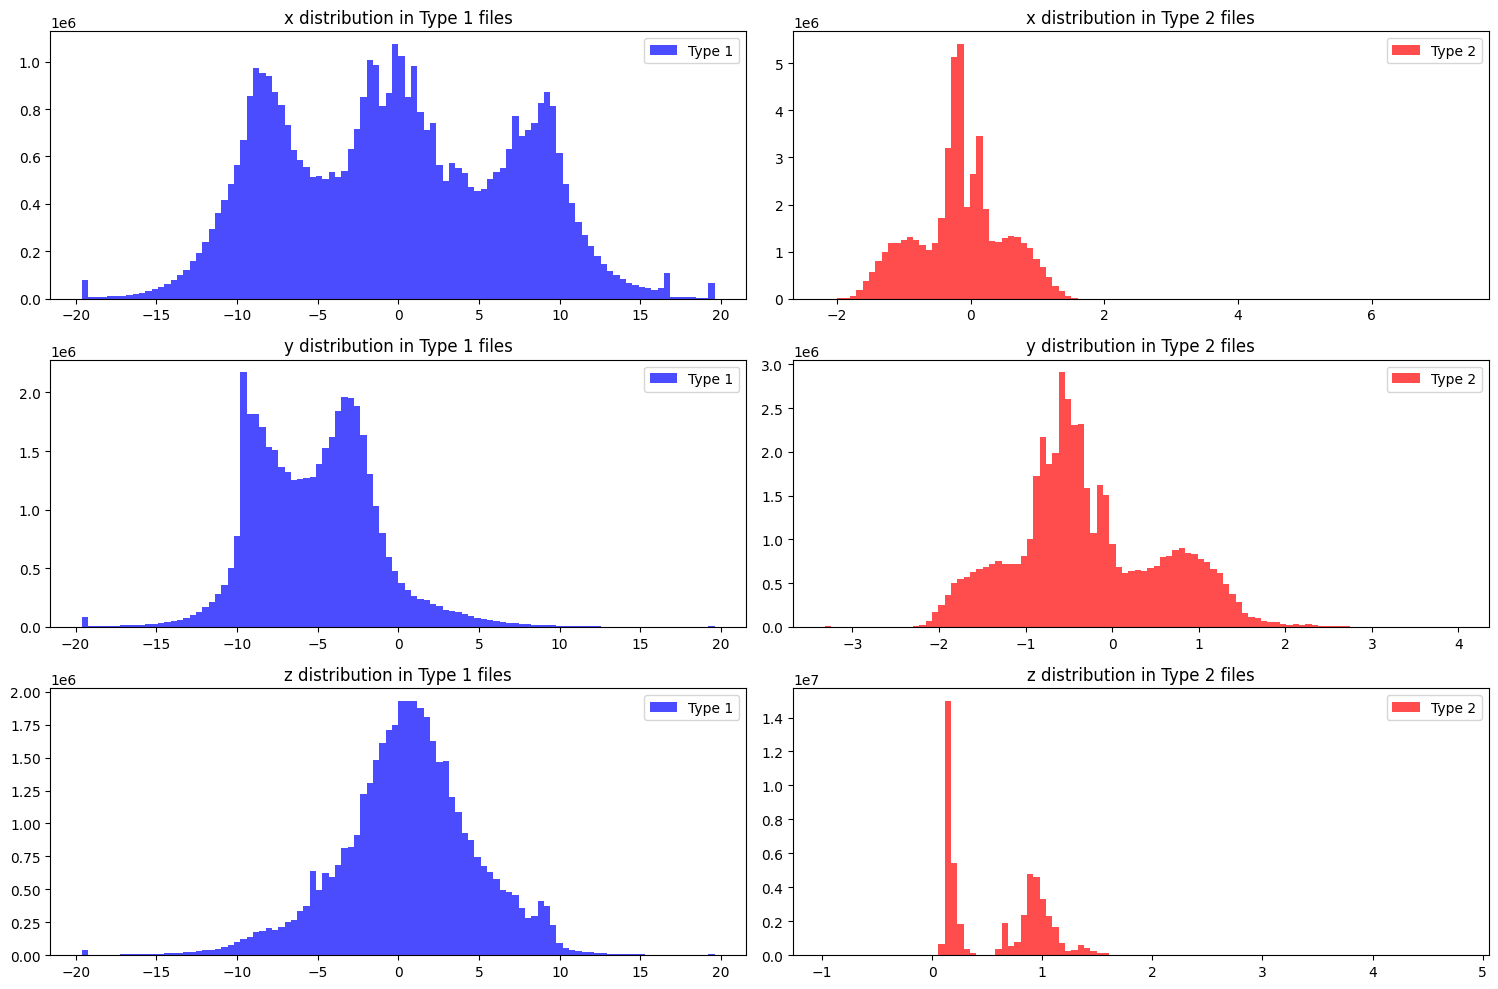

In [16]:
def show_distribution(type1_f, type2_f):
    fig, axes = plt.subplots(3, 2, figsize=(15, 10))  # Define axes here
    for i, col in enumerate(['x', 'y', 'z']):
        # Plot histogram for type 1 files
        ax = axes[i, 0]
        type1_df = pd.concat(type1_f)
        ax.hist(type1_df[col], bins=100, color='blue', alpha=0.7, label='Type 1')
        ax.set_title(f'{col} distribution in Type 1 files')
        ax.legend()

        # Plot histogram for type 2 files
        ax = axes[i, 1]
        type2_df = pd.concat(type2_f)
        type2_col_name = f'{col}'
        ax.hist(type2_df[type2_col_name], bins=100, color='red', alpha=0.7, label='Type 2')
        ax.set_title(f'{col} distribution in Type 2 files')
        ax.legend()

    plt.tight_layout()
    plt.show()

show_distribution(type1_files, type2_files)

In [17]:
import copy

type1_files_normalized = copy.deepcopy(type1_files)
type2_files_scalled = copy.deepcopy(type2_files)

for df in type1_files_normalized:
    df[['x', 'y', 'z']] /= 9.8

for df in type2_files_scalled:
    df[['x', 'y', 'z']] *= 9.8

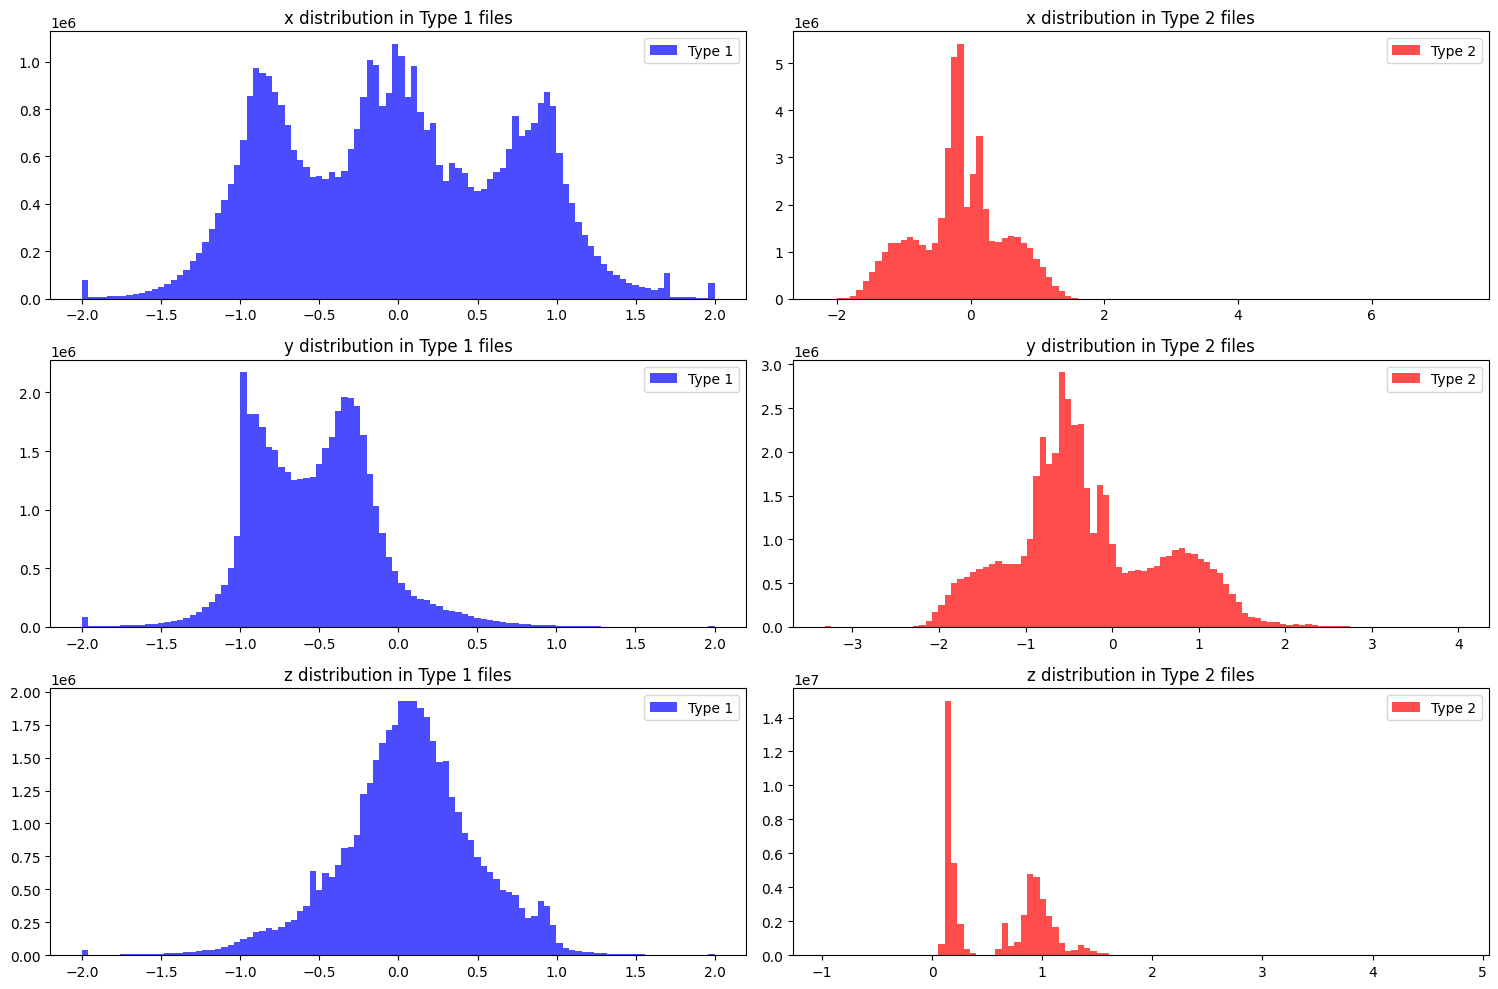

In [18]:
show_distribution(type1_files_normalized, type2_files)

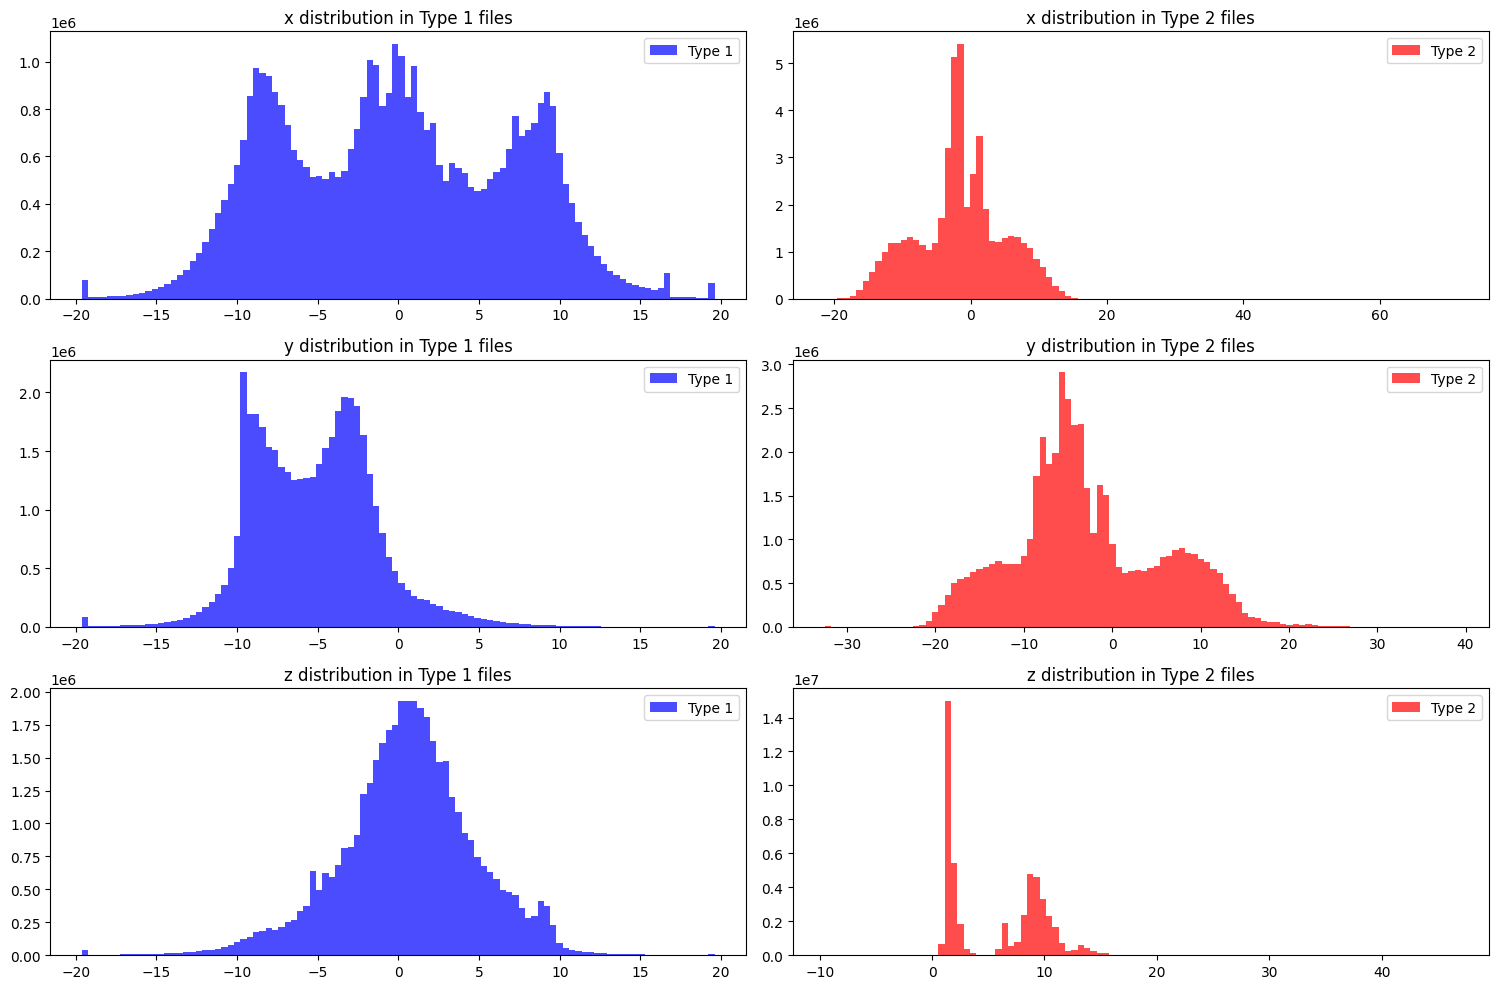

In [19]:
show_distribution(type1_files, type2_files_scalled)

After preprocessing the type 1 and type 2 files (especially removing unwanted lines from type 1), I noticed that the distribution of the x and y axes in both types appears visually similar and equal. In my opinion, they can be combined without introducing noise to the training model. However, the z-axis distribution in the type 2 files differs from the type 1 files in that it lacks negative values. This suggests that the type 1 files might represent data from a different sensor or measurement process compared to the type 2 files. We need to address this difference to prevent it from negatively impacting the training model.

Another note, about the scale of both measurements, it seems like multiplying files 2 with 9.8 can give us more accurate results than dividing file 1 with 9.8, in both ways we get some "equal length" between both measurements, but to have wider length than normalized length in this matter i think is better in my opinion, then in the training i'll consider multiplying files 2 measurements by 9.8.

Let's make further analysis on z-axis:

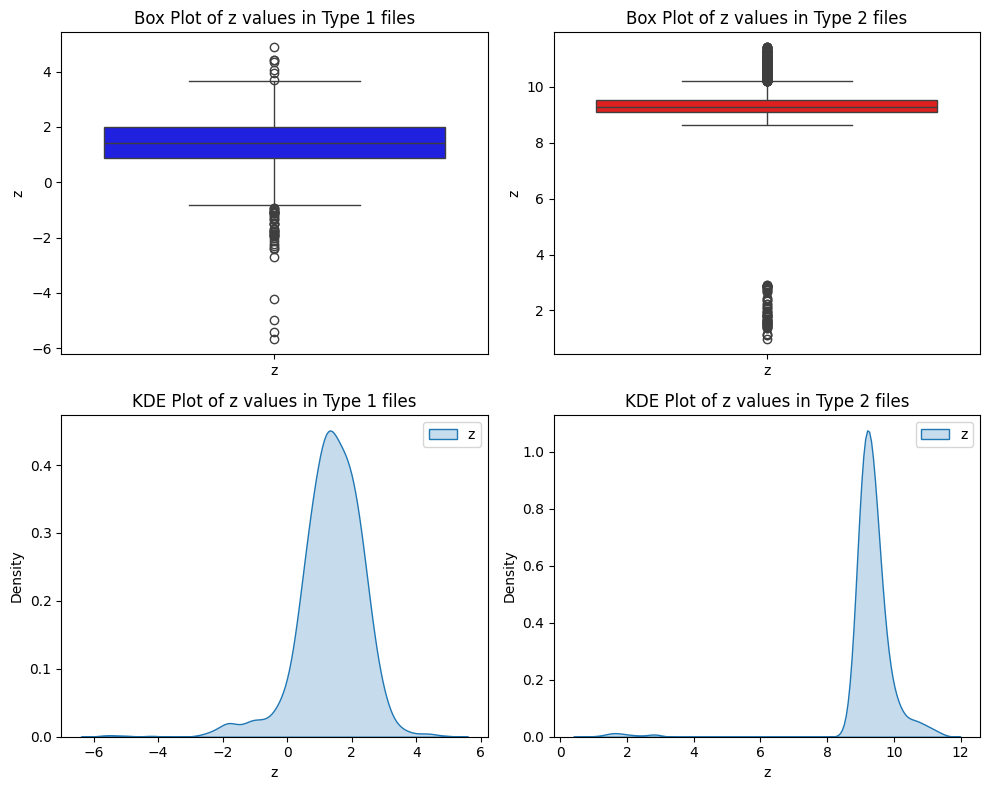

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# import scipy.stats as stats

def plot_additional_visualizations(type1_files, type2_files):
    # Create subplots for each visualization
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    # Box plots
    sns.boxplot(data=[df['z'] for df in type1_files], ax=axes[0, 0], color='blue')
    axes[0, 0].set_title('Box Plot of z values in Type 1 files')
    axes[0, 0].set_ylabel('z')

    sns.boxplot(data=[df['z'] for df in type2_files], ax=axes[0, 1], color='red')
    axes[0, 1].set_title('Box Plot of z values in Type 2 files')
    axes[0, 1].set_ylabel('z')

    # KDE plots
    for i, files in enumerate([type1_files, type2_files]):
        sns.kdeplot(data=[df['z'] for df in files], ax=axes[1, i], color='green', fill=True)
        axes[1, i].set_title(f'KDE Plot of z values in Type {i+1} files')
        axes[1, i].set_xlabel('z')
        axes[1, i].set_ylabel('Density')

    plt.tight_layout()
    plt.show()

# Plot additional visualizations
plot_additional_visualizations(type1_files, type2_files_scalled)


The only reasonable way to interpret this is by examining both the box plot and the KDE plot. From these visualizations, looking at type 2 files, it's apparent that the higher part of the box plot corresponds to measurements taken from devices placed in the hands, while the lower part represents devices positioned on the legs. The empty space between the two indicates the gap along the z-axis between the hands and legs. Since the floor marks the starting point of the z-axis measurements, which begin at 0, there are no negative values (this makes it so much reasonable). Additionally, the absence of activities involving bending the body among the 18 recorded activities supports this observation (Because no such activity required bending the body). The minimal measurements recorded with devices on the legs explain the sparse density of values between 0 and 4.

However, what about the z-axis measurements in file 1? Upon closer inspection, it becomes evident that the measurements did not start at the floor. Instead, z = 0 likely represents a specific point on the body, such as the hand (like a x-axis plain were taken a place in the measurements). As the device moves downward, negative values appears, with the narrow gap between -3 and -4 indicating the transition between hands and legs. The plots suggest that more tests were conducted using hand devices than leg devices.

What ca be done?

Before, we think about that let's conclude what preproccessing steps should be done:  **THIS IS SO IMPORTANT FOR THE TRAINING SECTION LATER**

1. Remove the measurements types from files 1 and keep only the measurements of acceleration. 

2. Change columns names in files 2 to x, y, z.

3. Multiply the measurements in type 2 by 10.

Now let's take a look at the following:

In [21]:
# Initialize dictionaries to store type 1 and type 2 files for each activity
type1_activity_files = {}
type2_activity_files = {}

# Iterate over the data dictionary
for id_, info in data.items():
    # Get the activity name
    activity = info['activity']
    
    # Get the dataframe
    df = info['dataframe']
    
    # Check if 'measurement type' column exists
    if 'measurement type' in df.columns:
        # Type 1 file
        if activity not in type1_activity_files:
            type1_activity_files[activity] = []
        type1_activity_files[activity].append(df)
    else:
        # Type 2 file
        if activity not in type2_activity_files:
            type2_activity_files[activity] = []
        type2_activity_files[activity].append(df)

print(len(type1_activity_files))
print(len(type2_activity_files))


18
16


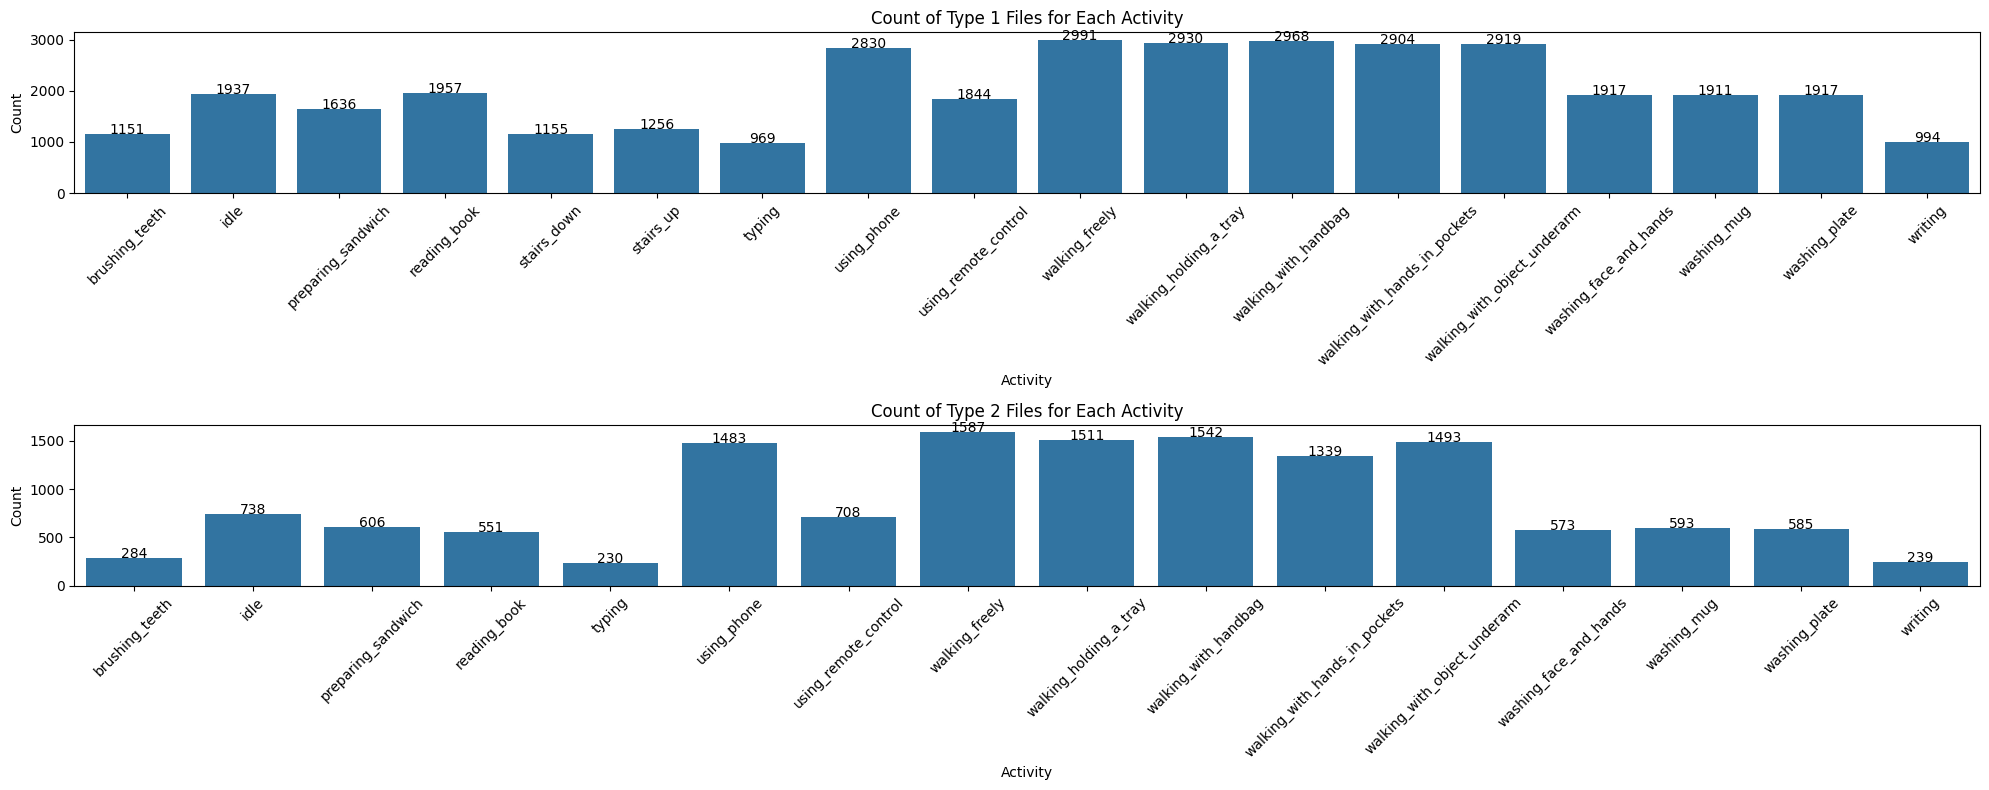

In [22]:
type1_activities = sorted(list(type1_activity_files.keys()))
type1_counts = [len(type1_activity_files[activity]) for activity in type1_activities]

# Get activity names and counts for type 2 files
type2_activities = sorted(list(type2_activity_files.keys()))
type2_counts = [len(type2_activity_files[activity]) for activity in type2_activities]

type1_counts_df = pd.DataFrame({'Activity': type1_activities, 'Count': type1_counts})
type2_counts_df = pd.DataFrame({'Activity': type2_activities, 'Count': type2_counts})

# Initialize subplots
fig, axes = plt.subplots(2, 1, figsize=(20, 8))

# Plot for type 1 files
sns.barplot(x='Activity', y='Count', data=type1_counts_df, ax=axes[0])
axes[0].set_title('Count of Type 1 Files for Each Activity')
axes[0].set_xlabel('Activity')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Add count annotations to each bar for type 1 files
for index, row in type1_counts_df.iterrows():
    axes[0].text(index, row['Count'], str(row['Count']), color='black', ha="center")

# Plot for type 2 files
sns.barplot(x='Activity', y='Count', data=type2_counts_df, ax=axes[1])
axes[1].set_title('Count of Type 2 Files for Each Activity')
axes[1].set_xlabel('Activity')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Add count annotations to each bar for type 2 files
for index, row in type2_counts_df.iterrows():
    axes[1].text(index, row['Count'], str(row['Count']), color='black', ha="center")

plt.tight_layout()
plt.show()

The data appears relatively balanced, with only a minor issue regarding to files of type 1 contain two activities not present in type 2 files.

 While reducing rows in type 1 files (by keeping only acceleration data) might seem like a significant loss, it's likely negligible due to the nearly threefold difference in the number of files between types 1 and 2. However, further analysis is necessary to confirm this, as definitive conclusions require evaluation during the training section. (we can use easy padding).

Let's notice one more time, that there is activities with much higher counts than other activities, which migh leads to that the model predicts towards those activities more.

Back to the z-axis problem, let's firstly pre-process the data (previous data was preprocessed but this isn't, because we got it again from the main data).

In [23]:
# Preprocessing for type 1 activity files
for activity, files in type1_activity_files.items():
    for df in files:
        # Remove measurements types from type 1 files and keep only the measurements of acceleration
        df.drop(df[df['measurement type'] != 'acceleration [m/s/s]'].index, inplace=True)
        # df.drop(columns=['measurement type'], inplace=True)

# Preprocessing for type 2 activity files
for activity, files in type2_activity_files.items():
    for df in files:
        # Change column names in type 2 files to x, y, z
        df.rename(columns={'x [m]': 'x', 'y [m]': 'y', 'z [m]': 'z'}, inplace=True)
        # Multiply the measurements in type 2 files by 10
        df[['x', 'y', 'z']] *= 9.8

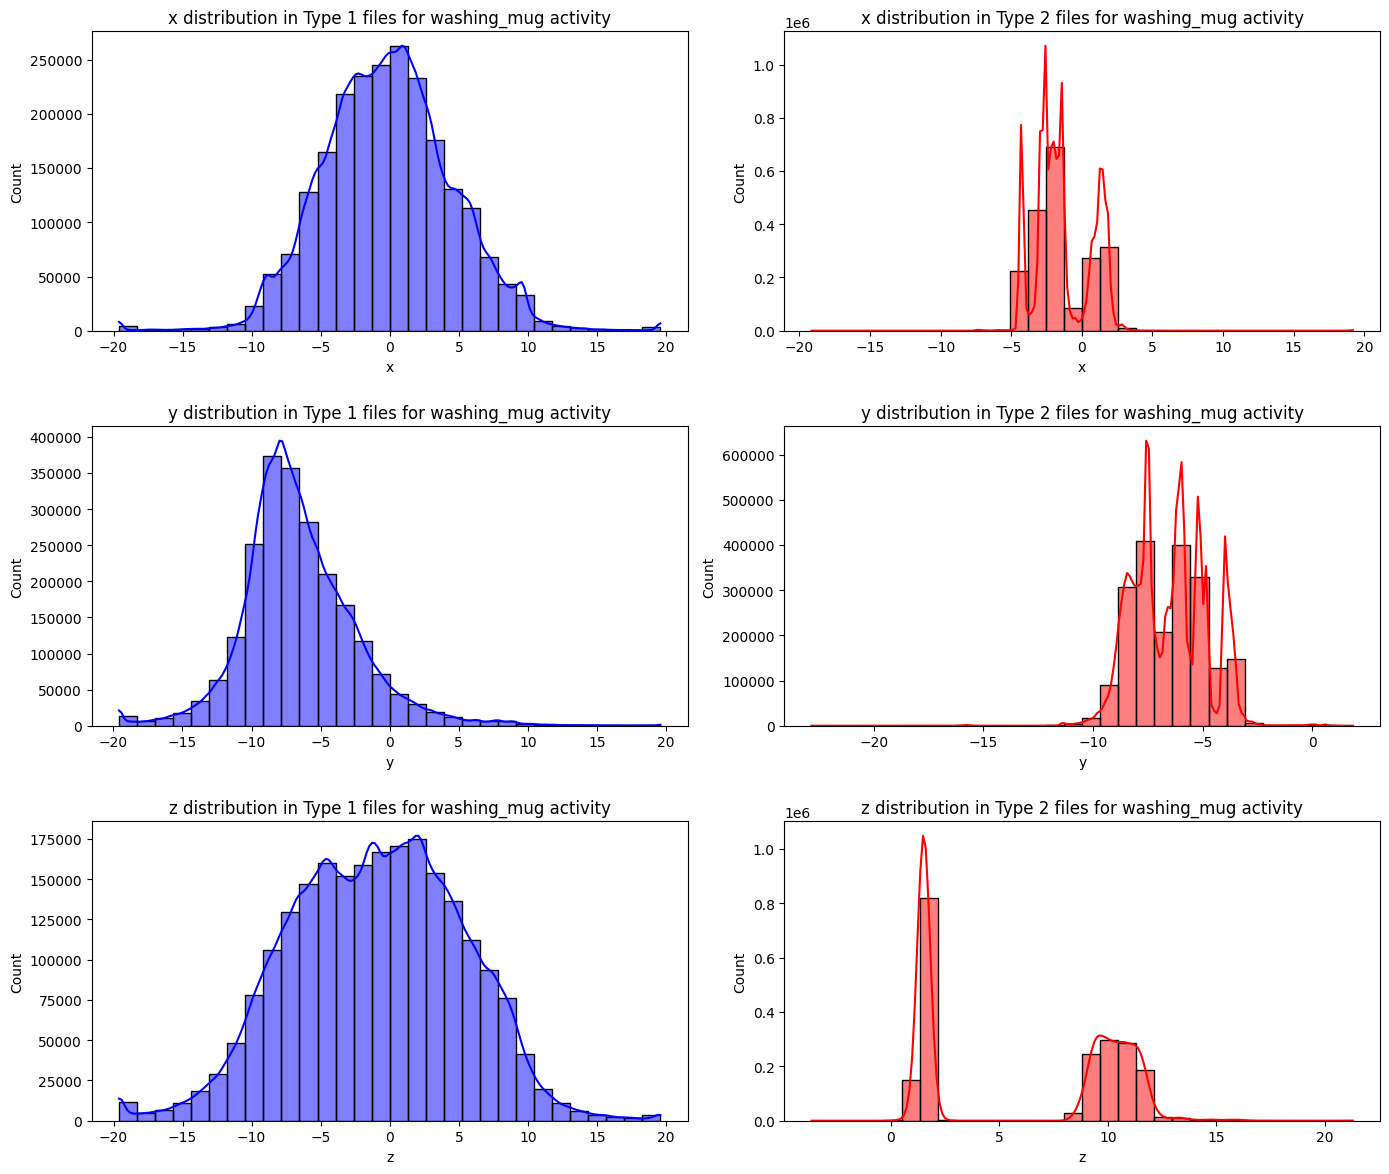

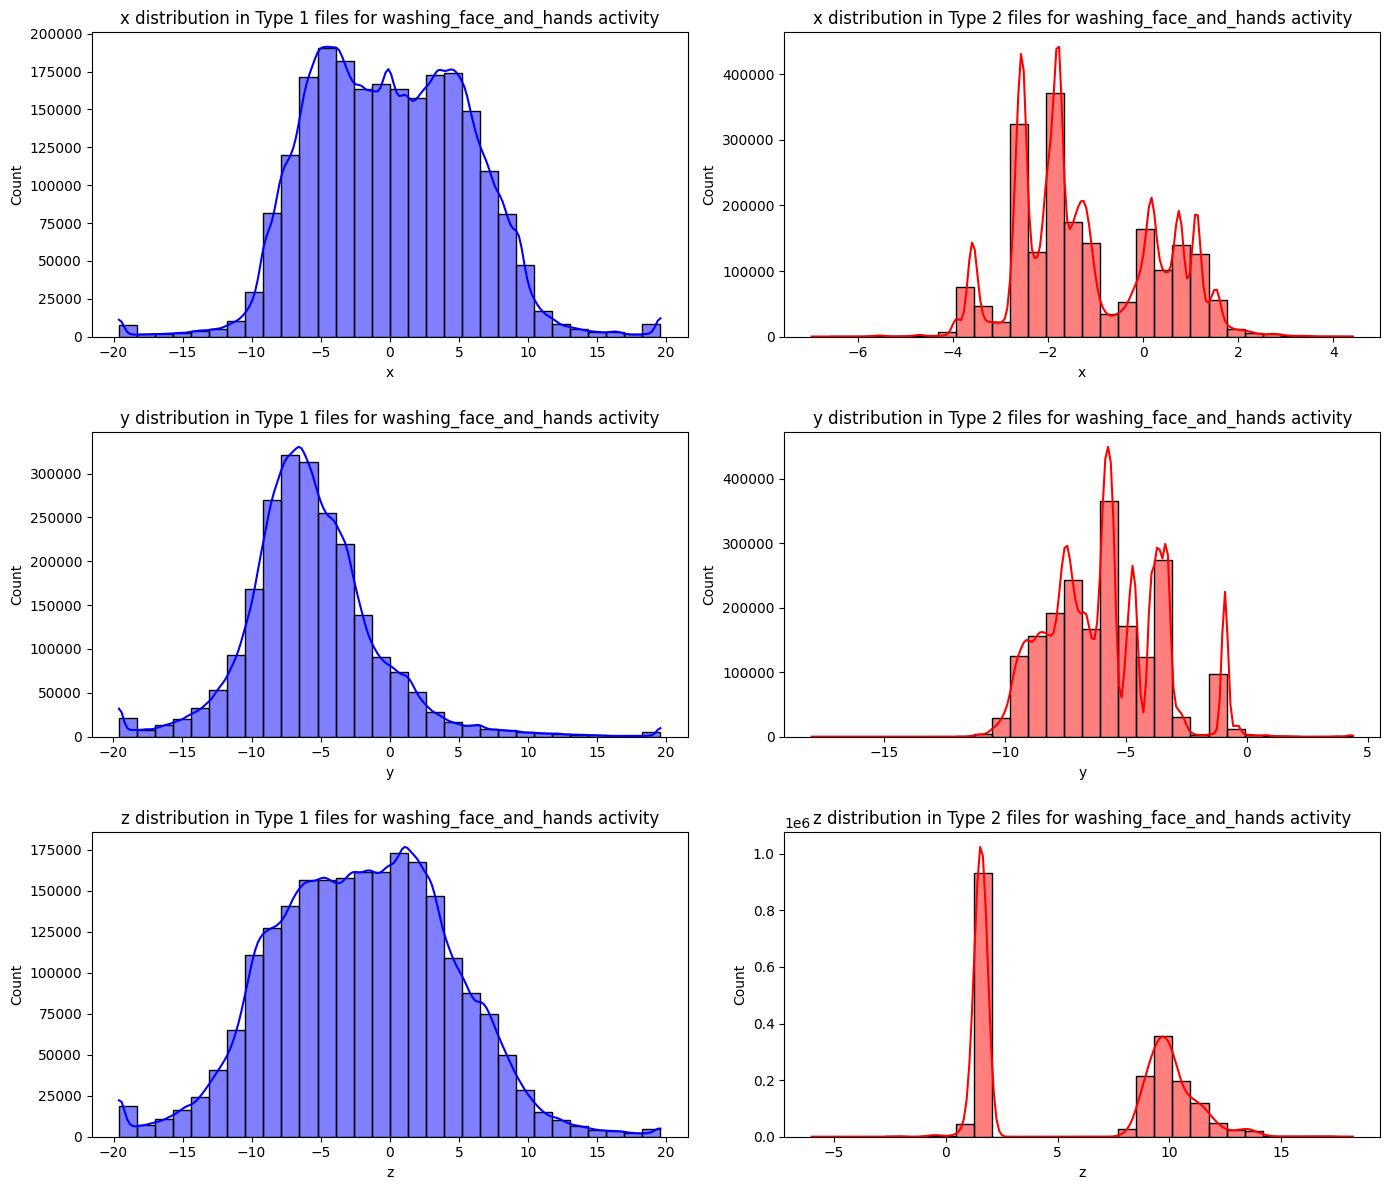

In [24]:
def distribution_in_activities(activity_name):
    # Get the files for the activity "walking_freely" from both type 1 and type 2
    type1_files_walking_freely = type1_activity_files.get(activity_name, [])
    type2_files_walking_freely = type2_activity_files.get(activity_name, [])

    # Plot the distributions of x, y, z for both type 1 and type 2 files side by side
    fig, axes = plt.subplots(3, 2, figsize=(14, 12))

    for i, col in enumerate(['x', 'y', 'z']):
        # Plot histograms for type 1 files
        sns.histplot(data=pd.concat(type1_files_walking_freely)[col], bins=30, color='blue', alpha=0.5, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'{col} distribution in Type 1 files for {activity_name} activity')
        
        # Plot histograms for type 2 files
        sns.histplot(data=pd.concat(type2_files_walking_freely)[col], bins=30, color='red', alpha=0.5, kde=True, ax=axes[i, 1])
        axes[i, 1].set_title(f'{col} distribution in Type 2 files for {activity_name} activity')

    plt.tight_layout()
    plt.show()

distribution_in_activities("washing_mug")
distribution_in_activities("washing_face_and_hands")

x and y axis seems like they are making sence (files 1 looks a bit wider), but z axis doesn't seem to be working.

We can also see that the activity of washing in general have some pattern in it.

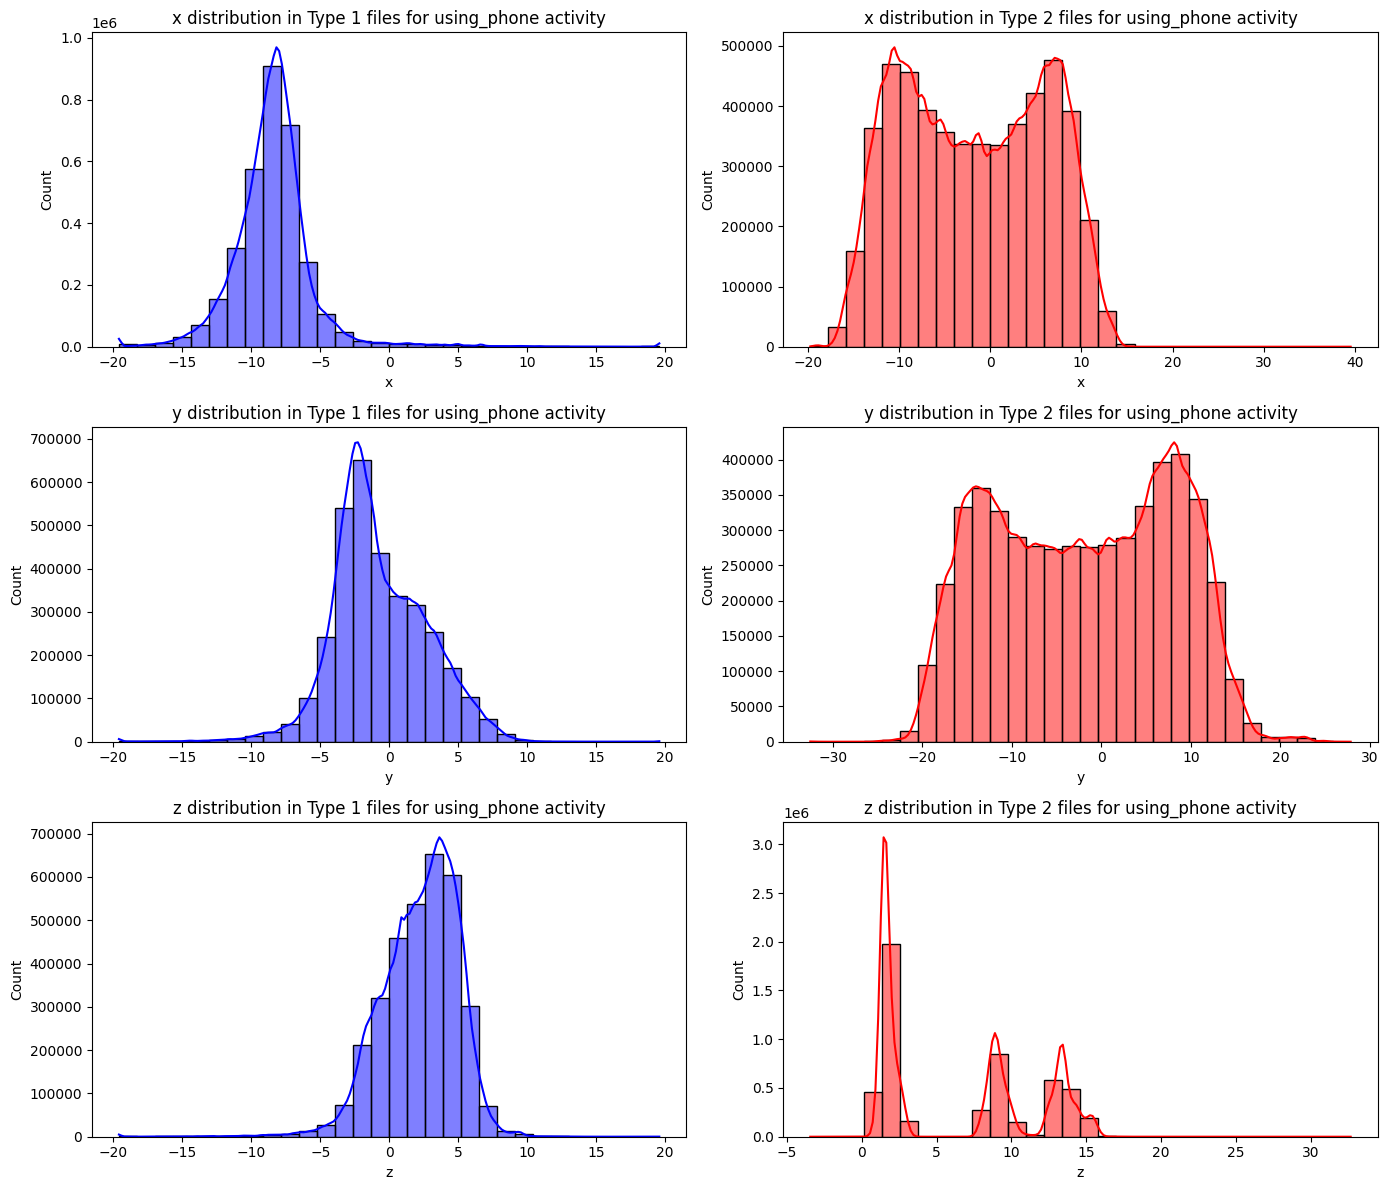

In [25]:
distribution_in_activities("using_phone")

Looking at the graphs, it seems easy to distinguish between washing in general and using phone as an example.

But one more time, z axis is making some noise.
In my opinion, the values between 0 and 1 are kind of don't like separation, they don't like to be "normally" distributed, so let's force them to do that (also the values bigger than 1), i'll try stretching the values of z axis in files type 2 to get a more distributed graph, and then i'll make sure that z axis in type 1 files have most positive values by shifting them.

In [26]:
type1_files_shifted = copy.deepcopy(type1_files)

# Multiply the z-axis values in type2_files_scalled by 2 after adding 1
for df in type1_files_shifted:
    df['z'] += 20


In [27]:
type2_files_transformed = copy.deepcopy(type2_files_scalled)

In [28]:
import numpy as np

# Define the desired range
desired_min = 0
desired_max = 40

# Iterate over each dataframe in the list
for df in type2_files_transformed:
    # Stretch the values distribution using Min-Max scaling
    min_val = df['z'].min()
    max_val = df['z'].max()
    df['z'] = ((df['z'] - min_val) / (max_val - min_val)) * (desired_max - desired_min) + desired_min

    # Clip values to ensure they fall within the desired range
    df['z'] = np.clip(df['z'], desired_min, desired_max)

# Now all values in each dataframe's 'z' column fall within the range of 0 to 40


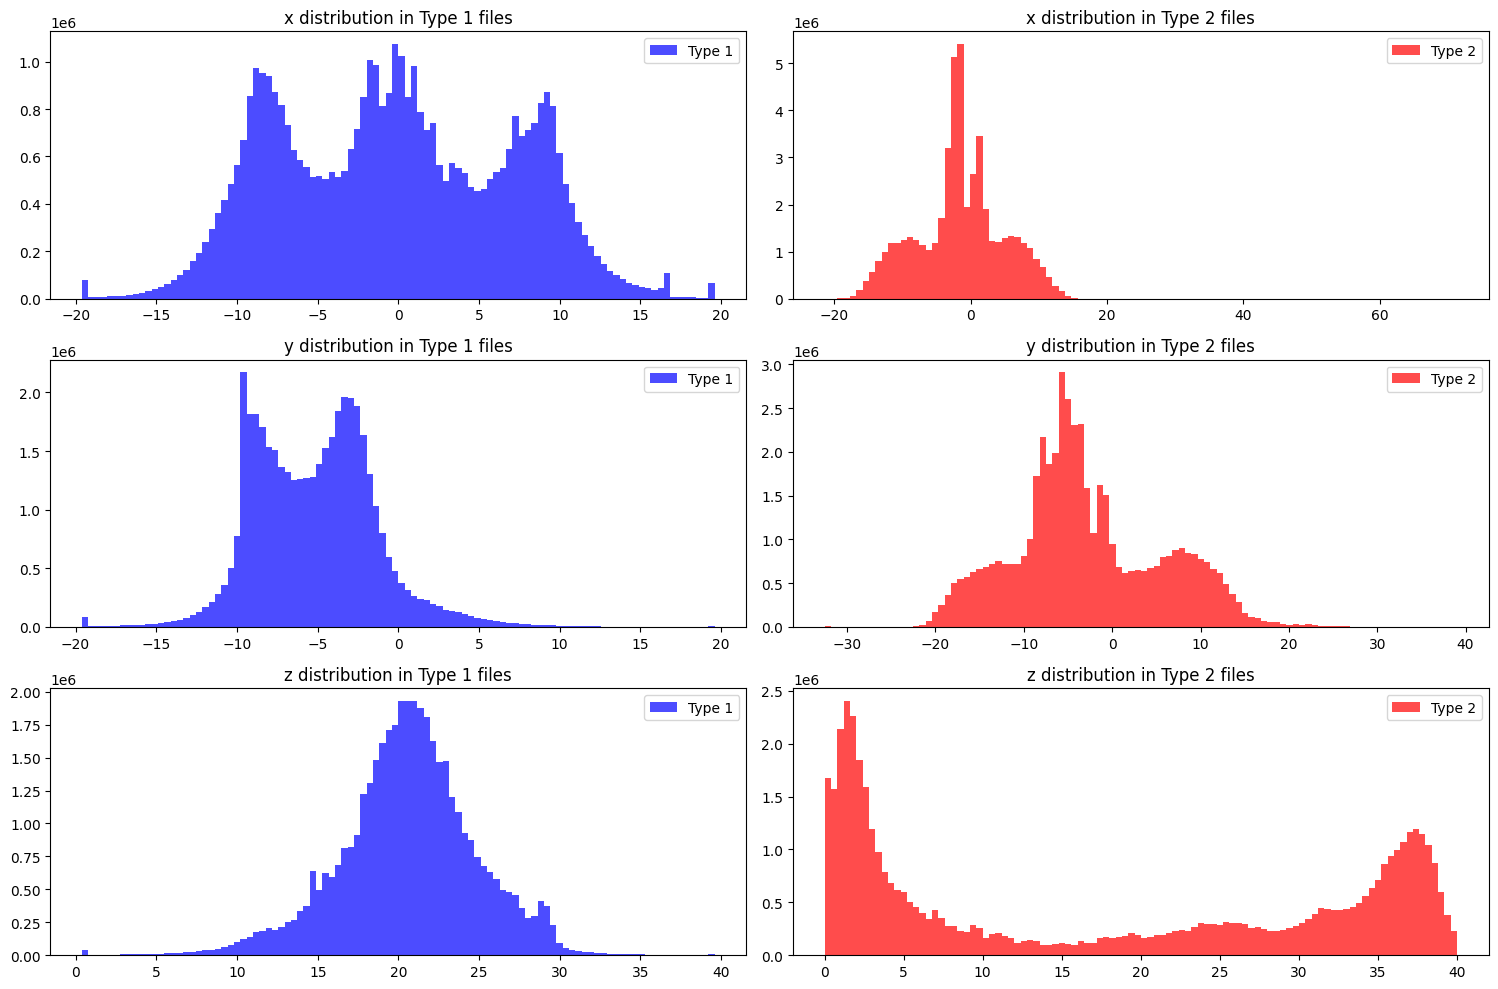

In [29]:
show_distribution(type1_files_shifted, type2_files_transformed)

This distriburions make more sence now, i reduced the noise, but still have to test the results and to decide wether this way made the model better or not.




In [30]:
smartwatch_sensor = []
vicon_sensor = []

for id_, info in data.items():
        if info['sensor'] == 'smartwatch':
            smartwatch_sensor.append(info['dataframe'])
        if info['sensor'] == 'vicon':
            vicon_sensor.append(info['dataframe'])

print(len(smartwatch_sensor))
print(len(vicon_sensor))

36186
14062


oh, so that what it's all about, how didn't i notice that before, type 1 files are all from the smartwatch sensor, and type 2 files are all from the vicon sensor.

43096
7152


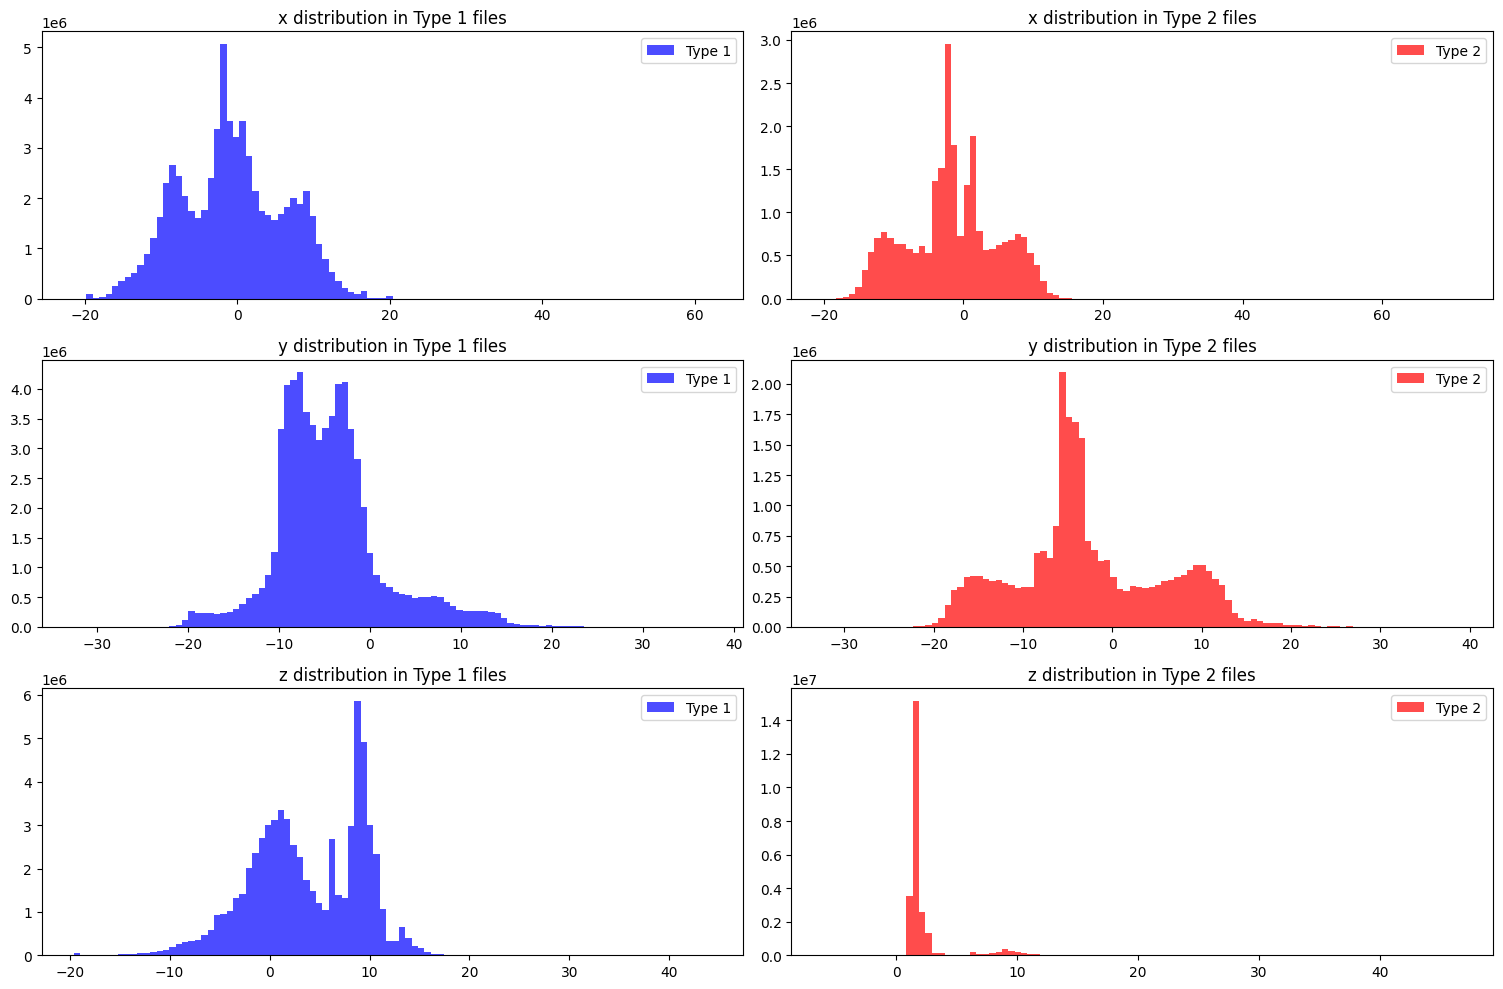

In [31]:
hand = []
foot = []

for id_, info in data.items():
        if info['body_part'] == 'hand':
            hand.append(info['dataframe'])
        if info['body_part'] == 'foot':
            foot.append(info['dataframe'])

print(len(hand))
print(len(foot))
show_distribution(hand, foot)

From this graph, we can see why the z axis in type 2 files is so different from the type 1 files, it's the foot z-axis measurement who is making the problem worse, i think because the foot doen't move freely like the hand in z-axis, it's always close to the floor, while hands move freely in z-axis.

I don't know if the preprocess of stretching the z axis will help, but we have to find out later in the project.

27382
22866


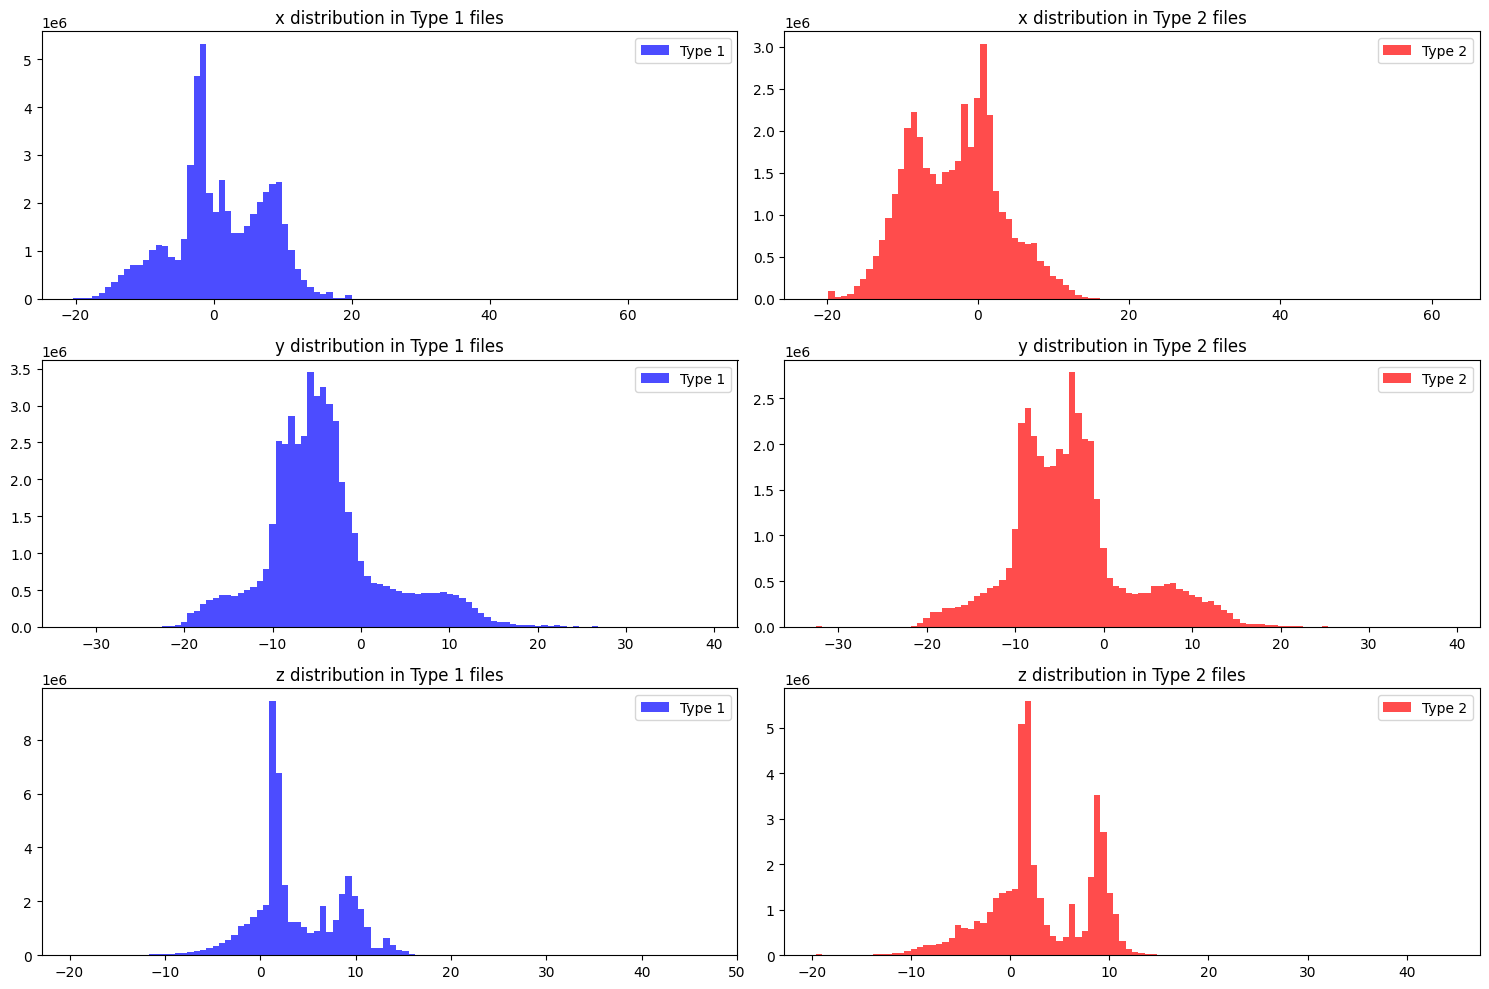

In [32]:
right = []
left = []

for id_, info in data.items():
        if info['side'] == 'right':
            right.append(info['dataframe'])
        if info['side'] == 'left':
            left.append(info['dataframe'])

print(len(right))
print(len(left))
show_distribution(right, left)

we can see here that there is balance between right and left side measurements, since the distribution of both looks so much the same, so no further analysis or preprocessing needs to be done in this case.

So, final steps of preprocessing are:

1. Remove the measurements types from files 1 and keep only the measurements of acceleration. 

2. Change columns names in files 2 to x, y, z.

3. Multiply the measurements in type 2 by 10.

4. Stretch the z-axis values distribution in all the dataframes within the type2 files and ensure that all values falls within a range of 0 to 40. (40 is changable to fit the model perfectly and get better results).

5. Shift the z-axis values in all files with type 1 by 20 data points. (20 is changable to fit the model perfetly for beter results).

6. I'll keep in mind padding files with type 1.

in the training i'll try steps 4 alone, 5 alone, 4 and 5 together, and without them and decide which steps are best for the model.

**Question 2.........................................., oh this assignment is pressing on me**

Go to the second ipynb file (Tip: clear your mind)